<a href="https://colab.research.google.com/github/dinethjanitha/London-House-Price-Prediction/blob/main/HousePricesPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Import London Hose price DataSet

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Assignment/train.csv")
train.head()

ID                            fullAddress postcode  country outcode  \
0   0       38 Adelina Grove, London, E1 3AD   E1 3AD  England      E1   
1   1      6 Cleveland Grove, London, E1 4XL   E1 4XL  England      E1   
2   2   65 Sanderstead Road, London, E10 7PW  E10 7PW  England     E10   
3   3  5 Queenswood Gardens, London, E11 3SE  E11 3SE  England     E11   
4   4     12 Woodlands Road, London, E11 4RW  E11 4RW  England     E11   

    latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0  51.519406  -0.053261        NaN       3.0          80.0          1.0   
1  51.521261  -0.053384        2.0       4.0         110.0          1.0   
2  51.569054  -0.034892        1.0       3.0          84.0          1.0   
3  51.564212   0.026292        NaN       2.0          72.0          1.0   
4  51.563430   0.006260        1.0       3.0         104.0          1.0   

      tenure         propertyType currentEnergyRating  sale_month  sale_year  \
0   Freehold  Semi-Detached House                   C           1       1995   
1  Leasehold     Terrace Property                   D           1       1995   
2   Freehold     Terrace Property                   D           1       1995   
3  Leasehold   Purpose Built Flat                 NaN           1       1995   
4   Freehold    Mid Terrace House                   D           1       1995   

   price  
0  77000  
1  89995  
2  59000  
3  51500  
4  63500

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Assignment/test.csv")
test.head()

ID                                        fullAddress postcode  \
0  266325  Flat 7, Philip House, Heneage Street, London, ...   E1 5LW   
1  266326                    17 Bowmans Mews, London, E1 8RY   E1 8RY   
2  266327  Flat 30, Everard House, Boyd Street, London, E...   E1 1LY   
3  266328  Flat 1, Wilton Court, Cavell Street, London, E...   E1 2BN   
4  266329                  45 Musbury Street, London, E1 0PJ   E1 0PJ   

   country outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
0  England      E1  51.518783  -0.071003        1.0       2.0          54.0   
1  England      E1  51.511624  -0.068236        1.0       1.0          48.0   
2  England      E1  51.512737  -0.066502        1.0       NaN          32.0   
3  England      E1  51.516165  -0.057334        1.0       3.0          85.0   
4  England      E1  51.515115  -0.051008        1.0       2.0          82.0   

   livingRooms     tenure        propertyType currentEnergyRating  sale_month  \
0          1.0  Leasehold     Flat/Maisonette                   D           1   
1          1.0  Leasehold  Purpose Built Flat                   D           1   
2          NaN  Leasehold     Flat/Maisonette                   C           1   
3          1.0  Leasehold  Purpose Built Flat                   D           1   
4          1.0  Leasehold     Flat/Maisonette                   C           1   

   sale_year  
0       2024  
1       2024  
2       2024  
3       2024  
4       2024

In [ ]:
train.isnull().sum()

ID                         0
fullAddress                0
postcode                   0
country                    0
outcode                    0
latitude                   0
longitude                  0
bathrooms              48479
bedrooms               24843
floorAreaSqM           13806
livingRooms            37040
tenure                  5721
propertyType             508
currentEnergyRating    56814
sale_month                 0
sale_year                  0
price                      0
dtype: int64

In [ ]:
test.isnull().sum()

ID                        0
fullAddress               0
postcode                  0
country                   0
outcode                   0
latitude                  0
longitude                 0
bathrooms              2624
bedrooms               1375
floorAreaSqM           2006
livingRooms            2095
tenure                  590
propertyType            167
currentEnergyRating    1497
sale_month                0
sale_year                 0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16547 entries, 0 to 16546
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16547 non-null  int64  
 1   fullAddress          16547 non-null  object 
 2   postcode             16547 non-null  object 
 3   country              16547 non-null  object 
 4   outcode              16547 non-null  object 
 5   latitude             16547 non-null  float64
 6   longitude            16547 non-null  float64
 7   bathrooms            13923 non-null  float64
 8   bedrooms             15172 non-null  float64
 9   floorAreaSqM         14541 non-null  float64
 10  livingRooms          14452 non-null  float64
 11  tenure               15957 non-null  object 
 12  propertyType         16380 non-null  object 
 13  currentEnergyRating  15050 non-null  object 
 14  sale_month           16547 non-null  int64  
 15  sale_year            16547 non-null 

In [ ]:
train.nunique()

ID                     266325
fullAddress            118345
postcode                45064
country                     1
outcode                   167
latitude                82653
longitude               83295
bathrooms                   9
bedrooms                    9
floorAreaSqM              488
livingRooms                 9
tenure                      4
propertyType               19
currentEnergyRating         7
sale_month                 12
sale_year                  29
price                   16882
dtype: int64

In [ ]:
test.nunique()

ID                     16547
fullAddress            16447
postcode               13366
country                    1
outcode                  159
latitude               14771
longitude              14790
bathrooms                  9
bedrooms                   9
floorAreaSqM             385
livingRooms                7
tenure                     4
propertyType              19
currentEnergyRating        7
sale_month                 8
sale_year                  1
dtype: int64

In [ ]:
train.describe()

ID       latitude      longitude      bathrooms  \
count  266325.000000  266325.000000  266325.000000  217846.000000   
mean   133162.000000      51.510090      -0.104639       1.439471   
std     76881.549558       0.056709       0.088074       0.721365   
min         0.000000      51.385708      -0.347055       1.000000   
25%     66581.000000      51.466685      -0.159167       1.000000   
50%    133162.000000      51.507202      -0.108622       1.000000   
75%    199743.000000      51.550937      -0.049202       2.000000   
max    266324.000000      51.665823       0.139249       9.000000   

            bedrooms   floorAreaSqM    livingRooms     sale_month  \
count  241482.000000  252519.000000  229285.000000  266325.000000   
mean        2.496140      99.624088       1.292160       6.805670   
std         1.172209      56.454683       0.583029       3.356693   
min         1.000000      10.000000       1.000000       1.000000   
25%         2.000000      63.000000       1.000000       4.000000   
50%         2.000000      85.000000       1.000000       7.000000   
75%         3.000000     118.000000       1.000000      10.000000   
max         9.000000     500.000000       9.000000      12.000000   

           sale_year         price  
count  266325.000000  2.663250e+05  
mean     2012.213855  6.161788e+05  
std         9.143113  1.274105e+06  
min      1995.000000  1.000000e+04  
25%      2004.000000  2.165000e+05  
50%      2014.000000  3.850000e+05  
75%      2021.000000  6.500000e+05  
max      2023.000000  1.000000e+08

In [ ]:
test.describe()

ID      latitude     longitude     bathrooms      bedrooms  \
count   16547.000000  16547.000000  16547.000000  13923.000000  15172.000000   
mean   274598.000000     51.510075     -0.112089      1.458091      2.523069   
std      4776.851788      0.058946      0.094244      0.732714      1.181028   
min    266325.000000     51.386308     -0.346560      1.000000      1.000000   
25%    270461.500000     51.465022     -0.186330      1.000000      2.000000   
50%    274598.000000     51.503620     -0.112590      1.000000      2.000000   
75%    278734.500000     51.551877     -0.038815      2.000000      3.000000   
max    282871.000000     51.663743      0.137557      9.000000      9.000000   

       floorAreaSqM   livingRooms    sale_month  sale_year  
count  14541.000000  14452.000000  16547.000000    16547.0  
mean      98.029915      1.306255      3.915574     2024.0  
std       54.491746      0.588833      2.123115        0.0  
min       10.000000      1.000000      1.000000     2024.0  
25%       63.000000      1.000000      2.000000     2024.0  
50%       84.000000      1.000000      4.000000     2024.0  
75%      114.000000      2.000000      6.000000     2024.0  
max      499.000000      7.000000      8.000000     2024.0

/tmp/ipython-input-3081196586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='bathrooms' , palette='pastel')


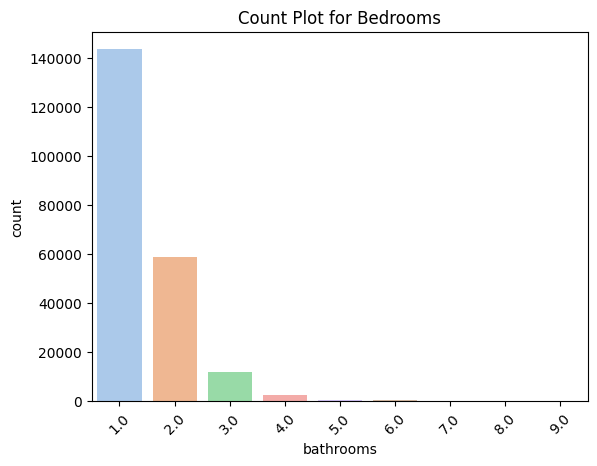

In [ ]:
sns.countplot(data=train, x='bathrooms' , palette='pastel')
plt.title("Count Plot for Bedrooms")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1074484121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='sale_year' , palette='pastel')


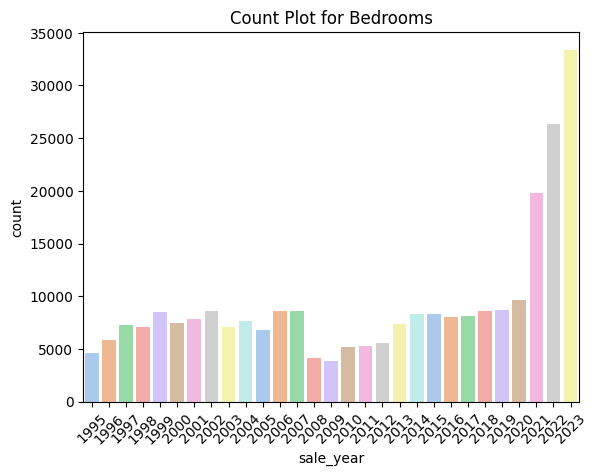

In [ ]:
sns.countplot(data=train, x='sale_year' , palette='pastel')
plt.title("Count Plot for Bedrooms")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3252401971.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='tenure' , palette='pastel')


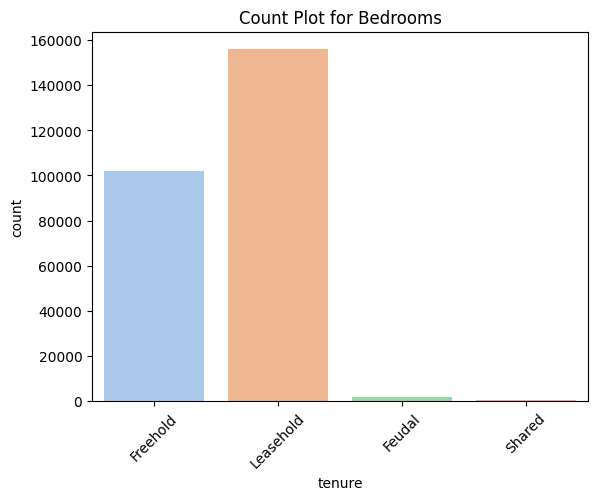

In [ ]:
sns.countplot(data=train, x='tenure' , palette='pastel')
plt.title("Count Plot for Bedrooms")
plt.xticks(rotation=45)
plt.show()

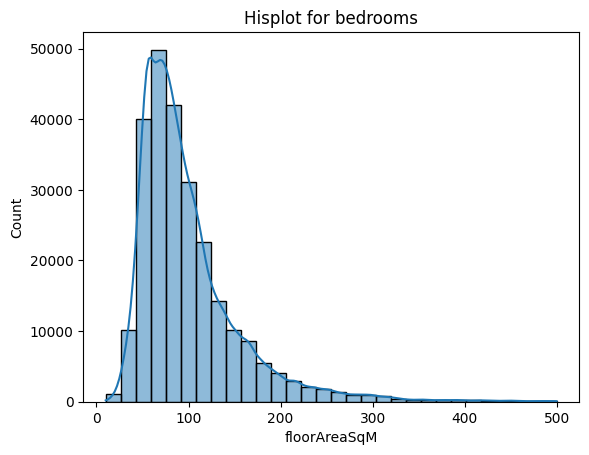

In [ ]:
sns.histplot(train["floorAreaSqM"] , kde=True , bins=30)
plt.title("Hisplot for bedrooms")
plt.show()

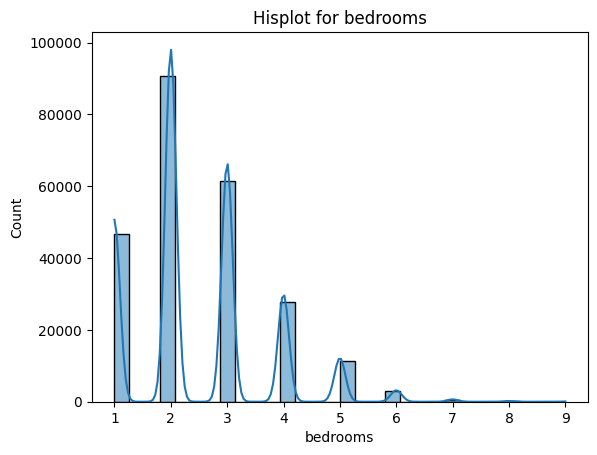

In [ ]:
sns.histplot(train["bedrooms"] , kde=True , bins=30)
plt.title("Hisplot for bedrooms")
plt.show()

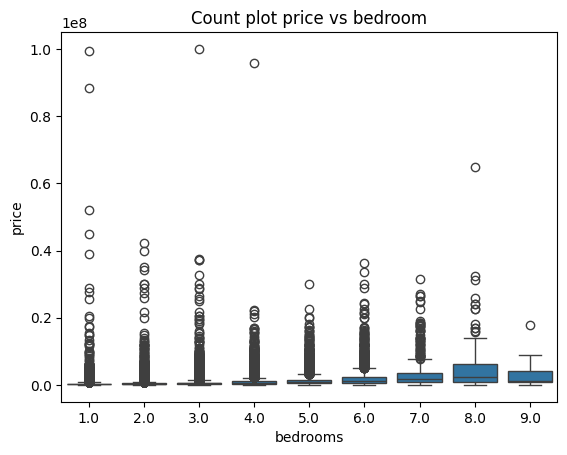

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.boxplot(data=train, x=train['bedrooms'],y=train['price'])
plt.title("Count plot price vs bedroom")
plt.figure(figsize=(10, 6))
plt.show()

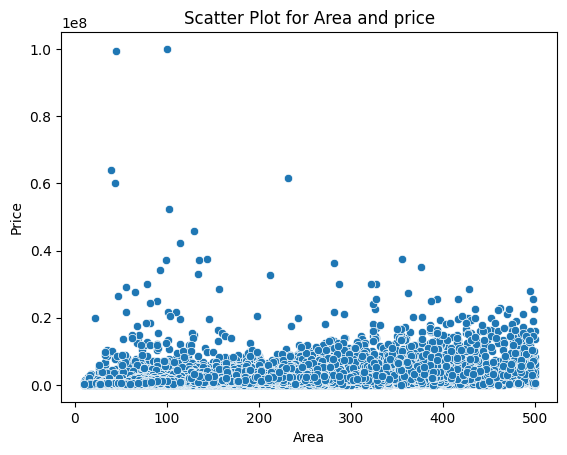

In [ ]:
sns.scatterplot(data=train, x='floorAreaSqM' , y='price')
plt.title("Scatter Plot for Area and price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

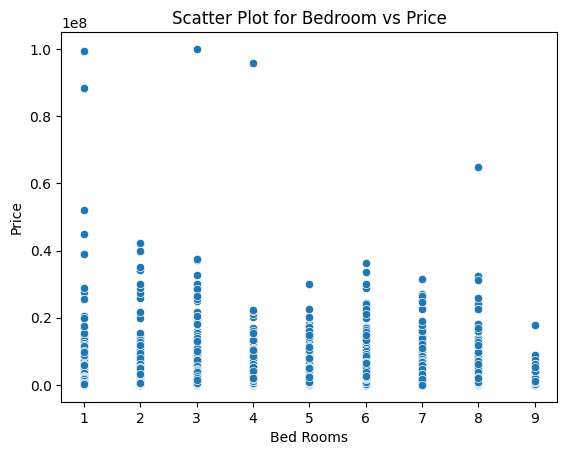

In [ ]:
sns.scatterplot(data=train, x='bedrooms' , y='price')
plt.title("Scatter Plot for Bedroom vs Price")
plt.xlabel('Bed Rooms')
plt.ylabel('Price')
plt.show()

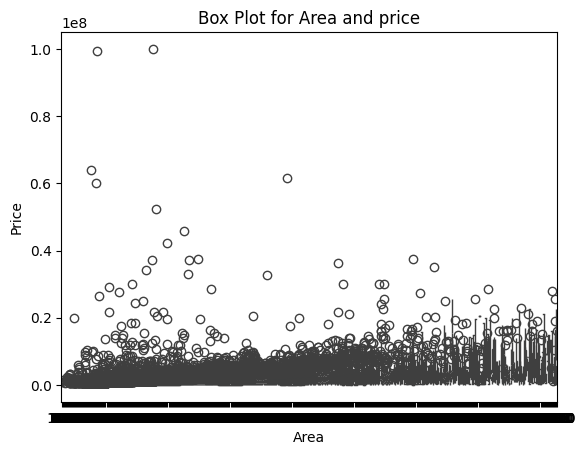

In [ ]:
sns.boxplot(data=train, x='floorAreaSqM' , y='price')
plt.title("Box Plot for Area and price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

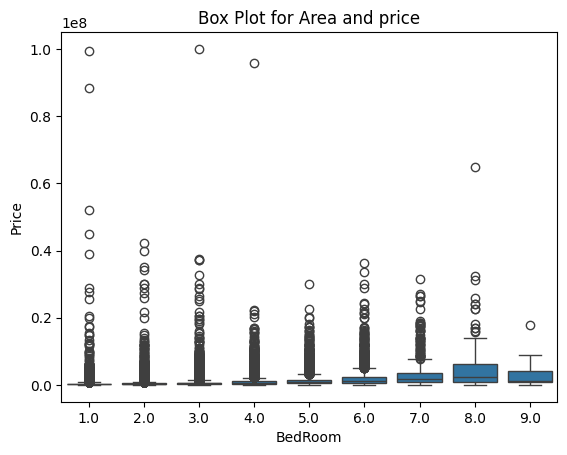

In [ ]:
sns.boxplot(data=train, x='bedrooms' , y='price')
plt.title("Box Plot for Area and price")
plt.xlabel('BedRoom')
plt.ylabel('Price')
plt.show()

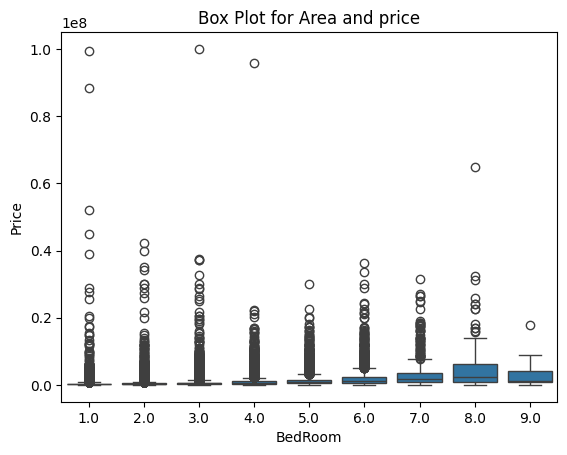

In [ ]:
sns.boxplot(data=train, x='bedrooms' , y='price')
plt.title("Box Plot for Area and price")
plt.xlabel('BedRoom')
plt.ylabel('Price')
plt.show()

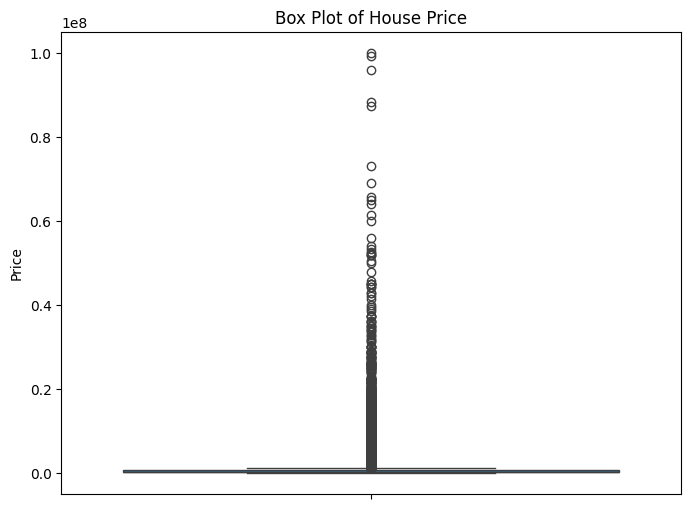

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=train['price'])
plt.title("Box Plot of House Price")
plt.ylabel("Price")
plt.show()

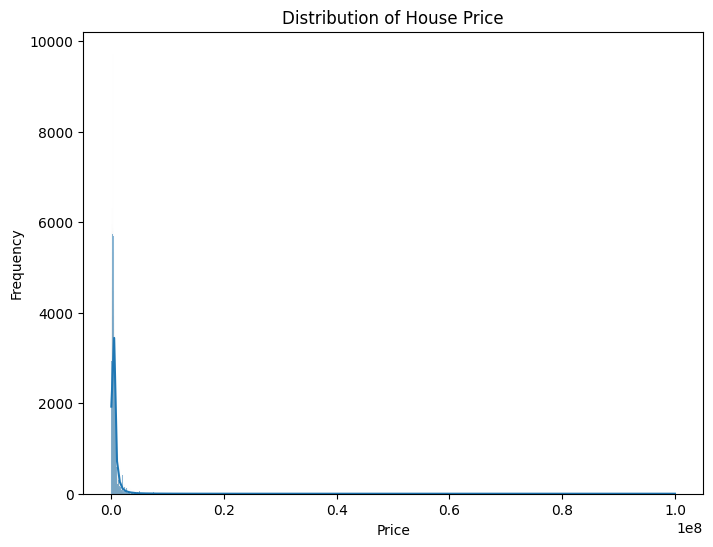

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(train['price'], kde=True)
plt.title("Distribution of House Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Train Data test info

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16547 entries, 0 to 16546
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16547 non-null  int64  
 1   fullAddress          16547 non-null  object 
 2   postcode             16547 non-null  object 
 3   country              16547 non-null  object 
 4   outcode              16547 non-null  object 
 5   latitude             16547 non-null  float64
 6   longitude            16547 non-null  float64
 7   bathrooms            13923 non-null  float64
 8   bedrooms             15172 non-null  float64
 9   floorAreaSqM         14541 non-null  float64
 10  livingRooms          14452 non-null  float64
 11  tenure               15957 non-null  object 
 12  propertyType         16380 non-null  object 
 13  currentEnergyRating  15050 non-null  object 
 14  sale_month           16547 non-null  int64  
 15  sale_year            16547 non-null 

Create A Copy from train dataset

In [ ]:
# # Add a 'source' column to distinguish between train and test data
# train['source'] = 'train'
# test['source'] = 'test'

# # Concatenate the dataframes
# data = pd.concat([train, test], ignore_index=True)

# # Display the first few rows of the merged dataframe
# display(data.head())


In [ ]:
train.shape

(266325, 17)

In [ ]:
test.shape

(16547, 16)

In [ ]:
# train_copy = train.copy()

In [ ]:
# train_copy.shape

Check Null

In [ ]:
# data.isnull().sum()

Drop Nulls

In [ ]:
train_data = train.dropna()
train_data.isnull().sum()

ID                     0
fullAddress            0
postcode               0
country                0
outcode                0
latitude               0
longitude              0
bathrooms              0
bedrooms               0
floorAreaSqM           0
livingRooms            0
tenure                 0
propertyType           0
currentEnergyRating    0
sale_month             0
sale_year              0
price                  0
dtype: int64

Check Shape

In [ ]:
train_data.shape

(169722, 17)

Check nulls again

In [ ]:
train_data.isnull().sum()

ID                     0
fullAddress            0
postcode               0
country                0
outcode                0
latitude               0
longitude              0
bathrooms              0
bedrooms               0
floorAreaSqM           0
livingRooms            0
tenure                 0
propertyType           0
currentEnergyRating    0
sale_month             0
sale_year              0
price                  0
dtype: int64

Additionally merge test and train

In [ ]:
train_data.describe()

ID       latitude      longitude      bathrooms  \
count  169722.000000  169722.000000  169722.000000  169722.000000   
mean   134357.625075      51.508873      -0.102383       1.444539   
std     77852.718624       0.059250       0.092029       0.710241   
min         1.000000      51.385708      -0.347055       1.000000   
25%     66642.250000      51.462993      -0.162537       1.000000   
50%    135823.500000      51.500823      -0.104427       1.000000   
75%    202904.500000      51.553957      -0.040814       2.000000   
max    266323.000000      51.665823       0.139249       9.000000   

            bedrooms   floorAreaSqM    livingRooms     sale_month  \
count  169722.000000  169722.000000  169722.000000  169722.000000   
mean        2.545810     101.597418       1.306077       6.826858   
std         1.172146      55.794404       0.583018       3.339291   
min         1.000000      10.000000       1.000000       1.000000   
25%         2.000000      64.000000       1.000000       4.000000   
50%         2.000000      87.000000       1.000000       7.000000   
75%         3.000000     121.000000       2.000000      10.000000   
max         9.000000     500.000000       7.000000      12.000000   

           sale_year         price  
count  169722.000000  1.697220e+05  
mean     2012.293633  5.602869e+05  
std         9.206771  7.682186e+05  
min      1995.000000  1.000000e+04  
25%      2004.000000  2.150000e+05  
50%      2015.000000  3.845000e+05  
75%      2021.000000  6.400000e+05  
max      2023.000000  3.750000e+07

In [ ]:
print(train_data.duplicated().sum())

0


In [ ]:
print(train_data.isnull().sum().to_string())

ID                     0
fullAddress            0
postcode               0
country                0
outcode                0
latitude               0
longitude              0
bathrooms              0
bedrooms               0
floorAreaSqM           0
livingRooms            0
tenure                 0
propertyType           0
currentEnergyRating    0
sale_month             0
sale_year              0
price                  0


In [ ]:
data = train_data
data.shape

(169722, 17)

In [ ]:
data['tenure'].unique()

array(['Leasehold', 'Freehold', 'Feudal', 'Shared'], dtype=object)

In [ ]:
data['propertyType'].unique()

array(['Terrace Property', 'Mid Terrace House', 'Converted Flat',
       'Purpose Built Flat', 'Semi-Detached House', 'End Terrace House',
       'Flat/Maisonette', 'Detached House', 'Bungalow Property',
       'Terraced', 'Mid Terrace Property', 'Detached Bungalow',
       'Semi-Detached Bungalow', 'End Terrace Property',
       'Terraced Bungalow', 'Mid Terrace Bungalow', 'Detached Property',
       'Semi-Detached Property', 'End Terrace Bungalow'], dtype=object)

In [ ]:
data['outcode'].unique()

array(['E1', 'E10', 'E11', 'E13', 'E14', 'E15', 'E17', 'E18', 'E3', 'E4',
       'E5', 'E8', 'EC2Y', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15',
       'N16', 'N17', 'N19', 'N2', 'N21', 'N22', 'N5', 'N6', 'N7', 'N8',
       'N9', 'NW1', 'NW10', 'NW11', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6',
       'NW8', 'SE1', 'SE10', 'SE11', 'SE13', 'SE15', 'SE16', 'SE17',
       'SE18', 'SE2', 'SE20', 'SE21', 'SE23', 'SE24', 'SE25', 'SE26',
       'SE27', 'SE28', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE9', 'SW10',
       'SW11', 'SW12', 'SW13', 'SW14', 'SW15', 'SW16', 'SW17', 'SW18',
       'SW19', 'SW1P', 'SW1V', 'SW1X', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6',
       'SW7', 'W10', 'W11', 'W12', 'W13', 'W14', 'W1F', 'W1H', 'W1J',
       'W1W', 'W2', 'W4', 'W6', 'W7', 'W8', 'WC1H', 'WC1R', 'WC1X',
       'WC2B', 'WC2H', 'E6', 'E7', 'N1', 'N18', 'N20', 'N3', 'N4', 'NW9',
       'SE12', 'SE19', 'SE22', 'SE8', 'SW1H', 'SW20', 'SW8', 'SW9', 'W1K',
       'W1T', 'W5', 'WC1A', 'WC1B', 'WC1E', 'WC2E', 'E12', 'E2', 'E9',

In [ ]:
len(data['postcode'].unique().tolist())

35901

Data labeling

In [ ]:
data['currentEnergyRating'].unique()

array(['D', 'C', 'B', 'E', 'F', 'G', 'A'], dtype=object)

In [ ]:
# print(outcodeMap.E2)

In [ ]:
outCodes = data['outcode'].unique();
outcodeMap = pd.Series()
i = 0;
for x in outCodes:
  print(x)
  outcodeMap[x] = i
  i += 1

print(outcodeMap.keys)

E1
E10
E11
E13
E14
E15
E17
E18
E3
E4
E5
E8
EC2Y
N10
N11
N12
N13
N14
N15
N16
N17
N19
N2
N21
N22
N5
N6
N7
N8
N9
NW1
NW10
NW11
NW2
NW3
NW4
NW5
NW6
NW8
SE1
SE10
SE11
SE13
SE15
SE16
SE17
SE18
SE2
SE20
SE21
SE23
SE24
SE25
SE26
SE27
SE28
SE3
SE4
SE5
SE6
SE7
SE9
SW10
SW11
SW12
SW13
SW14
SW15
SW16
SW17
SW18
SW19
SW1P
SW1V
SW1X
SW2
SW3
SW4
SW5
SW6
SW7
W10
W11
W12
W13
W14
W1F
W1H
W1J
W1W
W2
W4
W6
W7
W8
WC1H
WC1R
WC1X
WC2B
WC2H
E6
E7
N1
N18
N20
N3
N4
NW9
SE12
SE19
SE22
SE8
SW1H
SW20
SW8
SW9
W1K
W1T
W5
WC1A
WC1B
WC1E
WC2E
E12
E2
E9
NW7
SE14
SW1W
W1D
W1G
W1U
W3
W9
WC1N
EC4R
SW1E
EC1R
EC4A
SW1A
W1S
E16
WC2N
EC4V
E1W
EC1N
W1B
SW1Y
EC2A
EC3V
EC1A
EC1Y
EC4Y
EC1V
EC3A
EC3N
EC1M
EC4M
WC2R
EC2M
EC3R
WC2A
WC1V
EC2V
EC2R
W1C
<bound method Series.keys of E1        0
E10       1
E11       2
E13       3
E14       4
       ... 
WC2A    161
WC1V    162
EC2V    163
EC2R    164
W1C     165
Length: 166, dtype: int64>


In [ ]:
data['outcode'] = train['outcode'].map(outcodeMap)

/tmp/ipython-input-4206164688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outcode'] = train['outcode'].map(outcodeMap)


In [ ]:
data.head(5)

ID                                        fullAddress postcode  country  \
1   1                  6 Cleveland Grove, London, E1 4XL   E1 4XL  England   
2   2               65 Sanderstead Road, London, E10 7PW  E10 7PW  England   
4   4                 12 Woodlands Road, London, E11 4RW  E11 4RW  England   
5   5                  44A Stock Street, London, E13 0BY  E13 0BY  England   
6   6  Flat 11, Taffrail House, Burrells Wharf Square...  E14 3TG  England   

   outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
1      0.0  51.521261  -0.053384        2.0       4.0         110.0   
2      1.0  51.569054  -0.034892        1.0       3.0          84.0   
4      2.0  51.563430   0.006260        1.0       3.0         104.0   
5      3.0  51.528979   0.021411        1.0       2.0          67.0   
6      4.0  51.487861  -0.020064        1.0       1.0          53.0   

   livingRooms     tenure       propertyType currentEnergyRating  sale_month  \
1          1.0  Leasehold   Terrace Property                   D           1   
2          1.0   Freehold   Terrace Property                   D           1   
4          1.0   Freehold  Mid Terrace House                   D           1   
5          1.0  Leasehold     Converted Flat                   D           1   
6          1.0  Leasehold     Converted Flat                   D           1   

   sale_year  price  
1       1995  89995  
2       1995  59000  
4       1995  63500  
5       1995  15250  
6       1995  67000

In [ ]:
tenures = data['tenure'].unique()
tenuresMap = pd.Series()
i = 0;
for x in tenures :
  tenuresMap[x] = i
  i += 1
tenuresMap

Leasehold    0
Freehold     1
Feudal       2
Shared       3
dtype: int64

In [ ]:
data['tenure'] = data['tenure'].map(tenuresMap)

/tmp/ipython-input-381794616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure'] = data['tenure'].map(tenuresMap)


In [ ]:
data.head()

ID                                        fullAddress postcode  country  \
1   1                  6 Cleveland Grove, London, E1 4XL   E1 4XL  England   
2   2               65 Sanderstead Road, London, E10 7PW  E10 7PW  England   
4   4                 12 Woodlands Road, London, E11 4RW  E11 4RW  England   
5   5                  44A Stock Street, London, E13 0BY  E13 0BY  England   
6   6  Flat 11, Taffrail House, Burrells Wharf Square...  E14 3TG  England   

   outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
1      0.0  51.521261  -0.053384        2.0       4.0         110.0   
2      1.0  51.569054  -0.034892        1.0       3.0          84.0   
4      2.0  51.563430   0.006260        1.0       3.0         104.0   
5      3.0  51.528979   0.021411        1.0       2.0          67.0   
6      4.0  51.487861  -0.020064        1.0       1.0          53.0   

   livingRooms  tenure       propertyType currentEnergyRating  sale_month  \
1          1.0       0   Terrace Property                   D           1   
2          1.0       1   Terrace Property                   D           1   
4          1.0       1  Mid Terrace House                   D           1   
5          1.0       0     Converted Flat                   D           1   
6          1.0       0     Converted Flat                   D           1   

   sale_year  price  
1       1995  89995  
2       1995  59000  
4       1995  63500  
5       1995  15250  
6       1995  67000

In [ ]:
data.columns

Index(['ID', 'fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating', 'sale_month',
       'sale_year', 'price'],
      dtype='object')

In [ ]:
postalcodes = data['postcode'].unique()
print(len(postalcodes))
postalMap = {}
i = 0;
for x in postalcodes:
  postalMap[x] = i
  i += 1

print(len(postalMap))
# print(postalMap.keys())
# print(postalMap.keys())
# print(postalMap['E1 3AD']

35901
35901


In [ ]:
data['postcode'] = data['postcode'].map(postalMap)

/tmp/ipython-input-3343591224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['postcode'] = data['postcode'].map(postalMap)


In [ ]:
data.head()

ID                                        fullAddress  postcode  country  \
1   1                  6 Cleveland Grove, London, E1 4XL         0  England   
2   2               65 Sanderstead Road, London, E10 7PW         1  England   
4   4                 12 Woodlands Road, London, E11 4RW         2  England   
5   5                  44A Stock Street, London, E13 0BY         3  England   
6   6  Flat 11, Taffrail House, Burrells Wharf Square...         4  England   

   outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
1      0.0  51.521261  -0.053384        2.0       4.0         110.0   
2      1.0  51.569054  -0.034892        1.0       3.0          84.0   
4      2.0  51.563430   0.006260        1.0       3.0         104.0   
5      3.0  51.528979   0.021411        1.0       2.0          67.0   
6      4.0  51.487861  -0.020064        1.0       1.0          53.0   

   livingRooms  tenure       propertyType currentEnergyRating  sale_month  \
1          1.0       0   Terrace Property                   D           1   
2          1.0       1   Terrace Property                   D           1   
4          1.0       1  Mid Terrace House                   D           1   
5          1.0       0     Converted Flat                   D           1   
6          1.0       0     Converted Flat                   D           1   

   sale_year  price  
1       1995  89995  
2       1995  59000  
4       1995  63500  
5       1995  15250  
6       1995  67000

In [ ]:
propertyTypes = data['propertyType'].unique()
print(propertyTypes)
propertyTypeMap = pd.Series()
i = 0
for x in propertyTypes:
  propertyTypeMap[x] = i
  i += 1

propertyTypeMap.head()

['Terrace Property' 'Mid Terrace House' 'Converted Flat'
 'Purpose Built Flat' 'Semi-Detached House' 'End Terrace House'
 'Flat/Maisonette' 'Detached House' 'Bungalow Property' 'Terraced'
 'Mid Terrace Property' 'Detached Bungalow' 'Semi-Detached Bungalow'
 'End Terrace Property' 'Terraced Bungalow' 'Mid Terrace Bungalow'
 'Detached Property' 'Semi-Detached Property' 'End Terrace Bungalow']


Terrace Property       0
Mid Terrace House      1
Converted Flat         2
Purpose Built Flat     3
Semi-Detached House    4
dtype: int64

In [ ]:
data['propertyType'] = data['propertyType'].map(propertyTypeMap)

/tmp/ipython-input-2896552519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['propertyType'] = data['propertyType'].map(propertyTypeMap)


In [ ]:
data.head()

ID                                        fullAddress  postcode  country  \
1   1                  6 Cleveland Grove, London, E1 4XL         0  England   
2   2               65 Sanderstead Road, London, E10 7PW         1  England   
4   4                 12 Woodlands Road, London, E11 4RW         2  England   
5   5                  44A Stock Street, London, E13 0BY         3  England   
6   6  Flat 11, Taffrail House, Burrells Wharf Square...         4  England   

   outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
1      0.0  51.521261  -0.053384        2.0       4.0         110.0   
2      1.0  51.569054  -0.034892        1.0       3.0          84.0   
4      2.0  51.563430   0.006260        1.0       3.0         104.0   
5      3.0  51.528979   0.021411        1.0       2.0          67.0   
6      4.0  51.487861  -0.020064        1.0       1.0          53.0   

   livingRooms  tenure  propertyType currentEnergyRating  sale_month  \
1          1.0       0             0                   D           1   
2          1.0       1             0                   D           1   
4          1.0       1             1                   D           1   
5          1.0       0             2                   D           1   
6          1.0       0             2                   D           1   

   sale_year  price  
1       1995  89995  
2       1995  59000  
4       1995  63500  
5       1995  15250  
6       1995  67000

In [ ]:
energyRates = np.sort(data['currentEnergyRating'].unique())
print(energyRates)
energyRateMap = pd.Series()
i = 0;
for x in energyRates :
  energyRateMap[x] = i;
  i += 1

energyRates

['A' 'B' 'C' 'D' 'E' 'F' 'G']


array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
data['currentEnergyRating'] = data['currentEnergyRating'].map(energyRateMap)

/tmp/ipython-input-1021738831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['currentEnergyRating'] = data['currentEnergyRating'].map(energyRateMap)


In [ ]:
data.head()

ID                                        fullAddress  postcode  country  \
1   1                  6 Cleveland Grove, London, E1 4XL         0  England   
2   2               65 Sanderstead Road, London, E10 7PW         1  England   
4   4                 12 Woodlands Road, London, E11 4RW         2  England   
5   5                  44A Stock Street, London, E13 0BY         3  England   
6   6  Flat 11, Taffrail House, Burrells Wharf Square...         4  England   

   outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
1      0.0  51.521261  -0.053384        2.0       4.0         110.0   
2      1.0  51.569054  -0.034892        1.0       3.0          84.0   
4      2.0  51.563430   0.006260        1.0       3.0         104.0   
5      3.0  51.528979   0.021411        1.0       2.0          67.0   
6      4.0  51.487861  -0.020064        1.0       1.0          53.0   

   livingRooms  tenure  propertyType  currentEnergyRating  sale_month  \
1          1.0       0             0                    3           1   
2          1.0       1             0                    3           1   
4          1.0       1             1                    3           1   
5          1.0       0             2                    3           1   
6          1.0       0             2                    3           1   

   sale_year  price  
1       1995  89995  
2       1995  59000  
4       1995  63500  
5       1995  15250  
6       1995  67000

In [ ]:
data.head()

ID                                        fullAddress  postcode  country  \
1   1                  6 Cleveland Grove, London, E1 4XL         0  England   
2   2               65 Sanderstead Road, London, E10 7PW         1  England   
4   4                 12 Woodlands Road, London, E11 4RW         2  England   
5   5                  44A Stock Street, London, E13 0BY         3  England   
6   6  Flat 11, Taffrail House, Burrells Wharf Square...         4  England   

   outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
1      0.0  51.521261  -0.053384        2.0       4.0         110.0   
2      1.0  51.569054  -0.034892        1.0       3.0          84.0   
4      2.0  51.563430   0.006260        1.0       3.0         104.0   
5      3.0  51.528979   0.021411        1.0       2.0          67.0   
6      4.0  51.487861  -0.020064        1.0       1.0          53.0   

   livingRooms  tenure  propertyType  currentEnergyRating  sale_month  \
1          1.0       0             0                    3           1   
2          1.0       1             0                    3           1   
4          1.0       1             1                    3           1   
5          1.0       0             2                    3           1   
6          1.0       0             2                    3           1   

   sale_year  price  
1       1995  89995  
2       1995  59000  
4       1995  63500  
5       1995  15250  
6       1995  67000

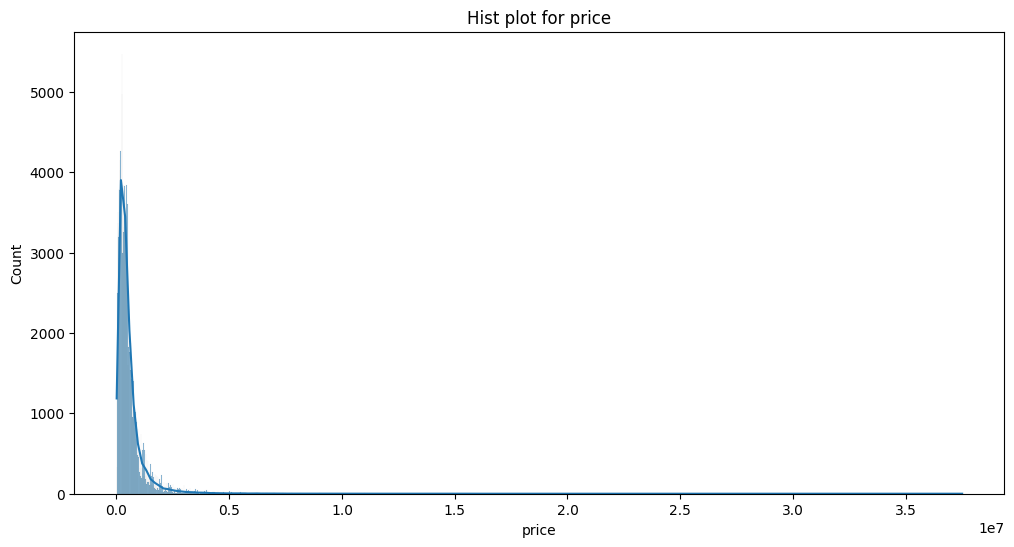

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data['price'] , kde=True)
plt.title("Hist plot for price")
plt.show()

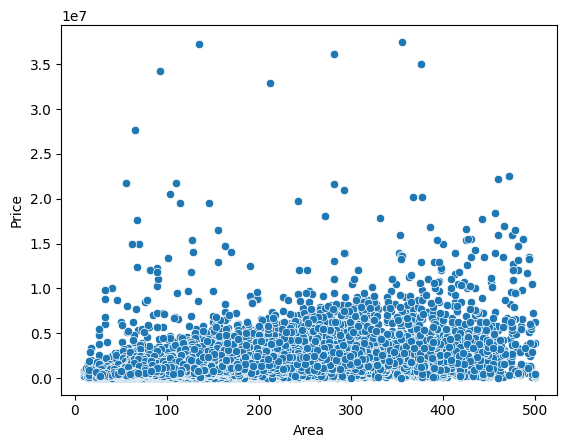

In [ ]:
sns.scatterplot(data=data , x=data['floorAreaSqM'] , y=data['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [ ]:
Q1 = data['price'].quantile(0.25)
print(Q1)
Q3 = data['price'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)


215000.0
640000.0
425000.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

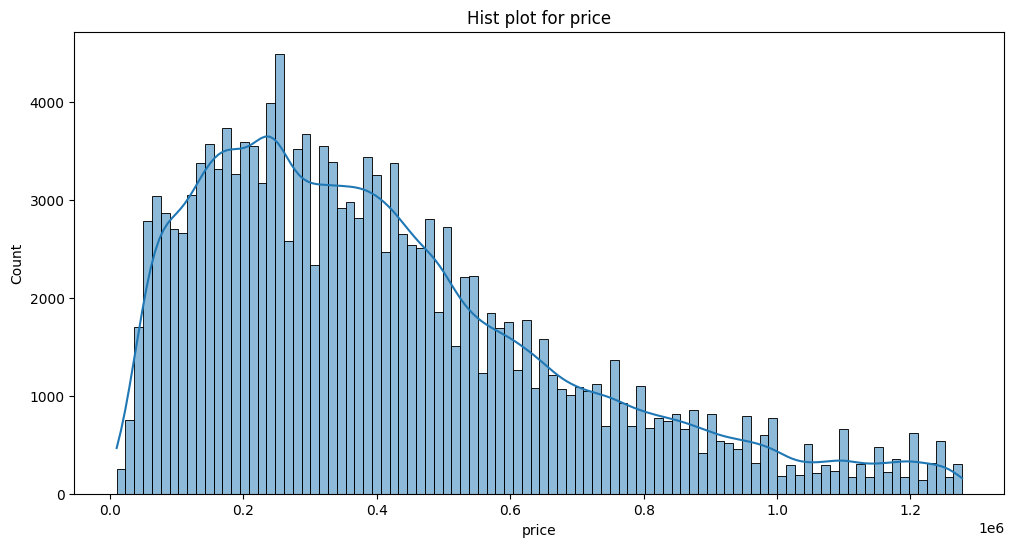

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data['price'] , kde=True)
plt.title("Hist plot for price")
plt.show()

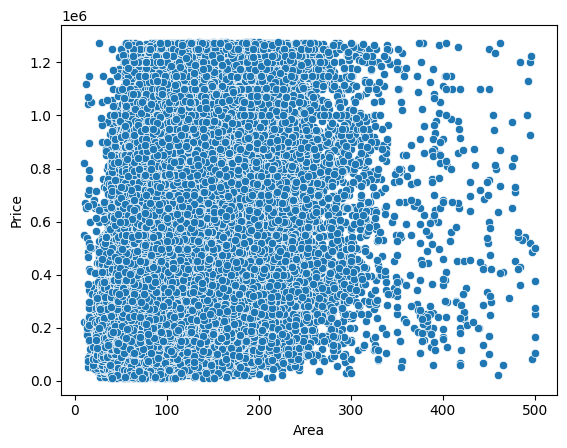

In [ ]:
sns.scatterplot(data=data , x=data['floorAreaSqM'] , y=data['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [ ]:
data =  data[
    (data['price'] >= data['price'].quantile(0.01)) &
    (data['price'] <= data['price'].quantile(0.99)) &
    (data['floorAreaSqM'] >= data['floorAreaSqM'].quantile(0.01)) &
    (data['floorAreaSqM'] <= data['floorAreaSqM'].quantile(0.99))
]

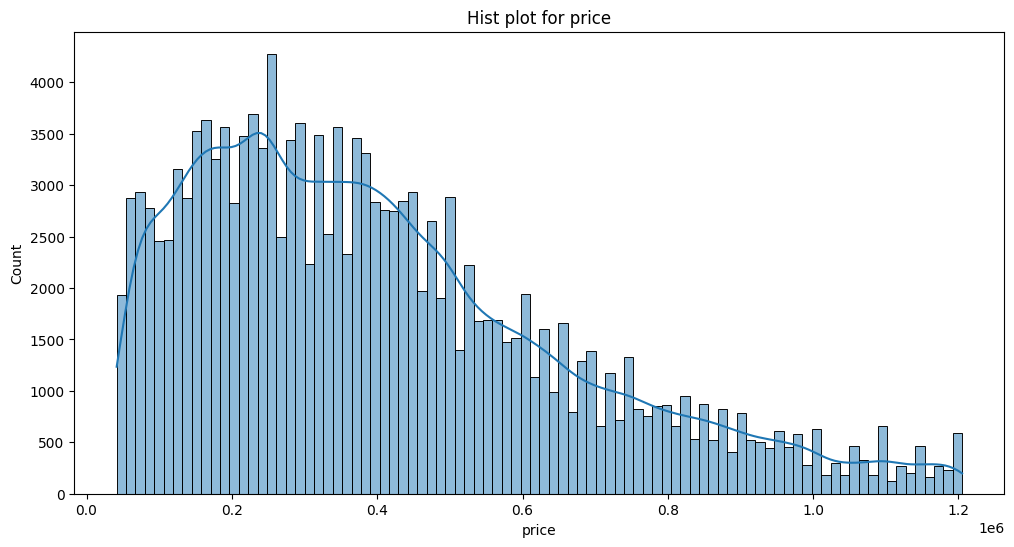

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data['price'] , kde=True)
plt.title("Hist plot for price")
plt.show()

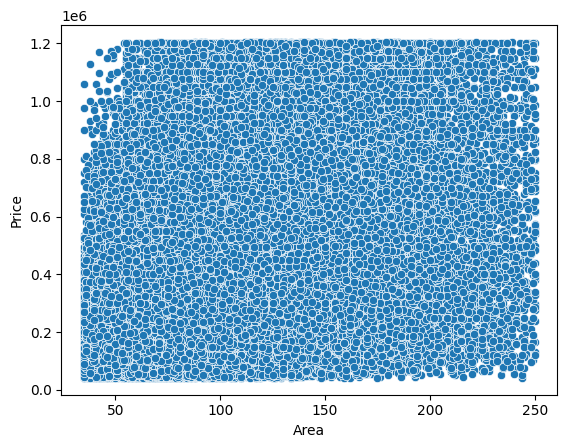

In [ ]:
sns.scatterplot(data=data , x=data['floorAreaSqM'] , y=data['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

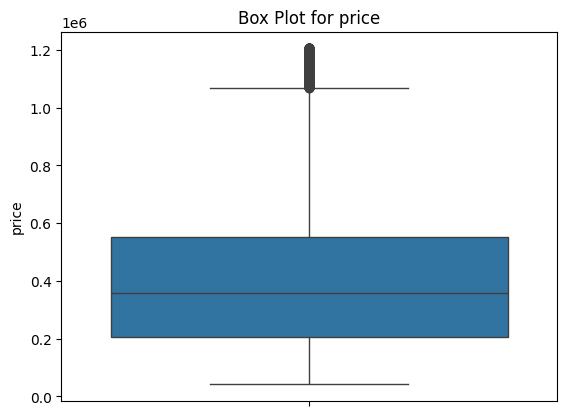

In [ ]:
sns.boxplot(data['price'])
plt.title("Box Plot for price")
plt.show()

In [ ]:
x = data[['postcode' , 'outcode' , 'latitude' , 'longitude' , 'bathrooms' , 'floorAreaSqM' , 'livingRooms' , 'tenure' , 'propertyType' , 'currentEnergyRating' , 'sale_year']]
x.head()

postcode  outcode   latitude  longitude  bathrooms  floorAreaSqM  \
1         0      0.0  51.521261  -0.053384        2.0         110.0   
2         1      1.0  51.569054  -0.034892        1.0          84.0   
4         2      2.0  51.563430   0.006260        1.0         104.0   
6         4      4.0  51.487861  -0.020064        1.0          53.0   
7         5      5.0  51.553700  -0.005362        2.0         109.0   

   livingRooms  tenure  propertyType  currentEnergyRating  sale_year  
1          1.0       0             0                    3       1995  
2          1.0       1             0                    3       1995  
4          1.0       1             1                    3       1995  
6          1.0       0             2                    3       1995  
7          2.0       1             0                    3       1995

In [ ]:
y = data['price']
y.head()

1    89995
2    59000
4    63500
6    67000
7    52000
Name: price, dtype: int64

In [ ]:
print("X train shape")
print(x.shape)
print("y train shape")
print(y.shape)


X train shape
(150827, 11)
y train shape
(150827,)


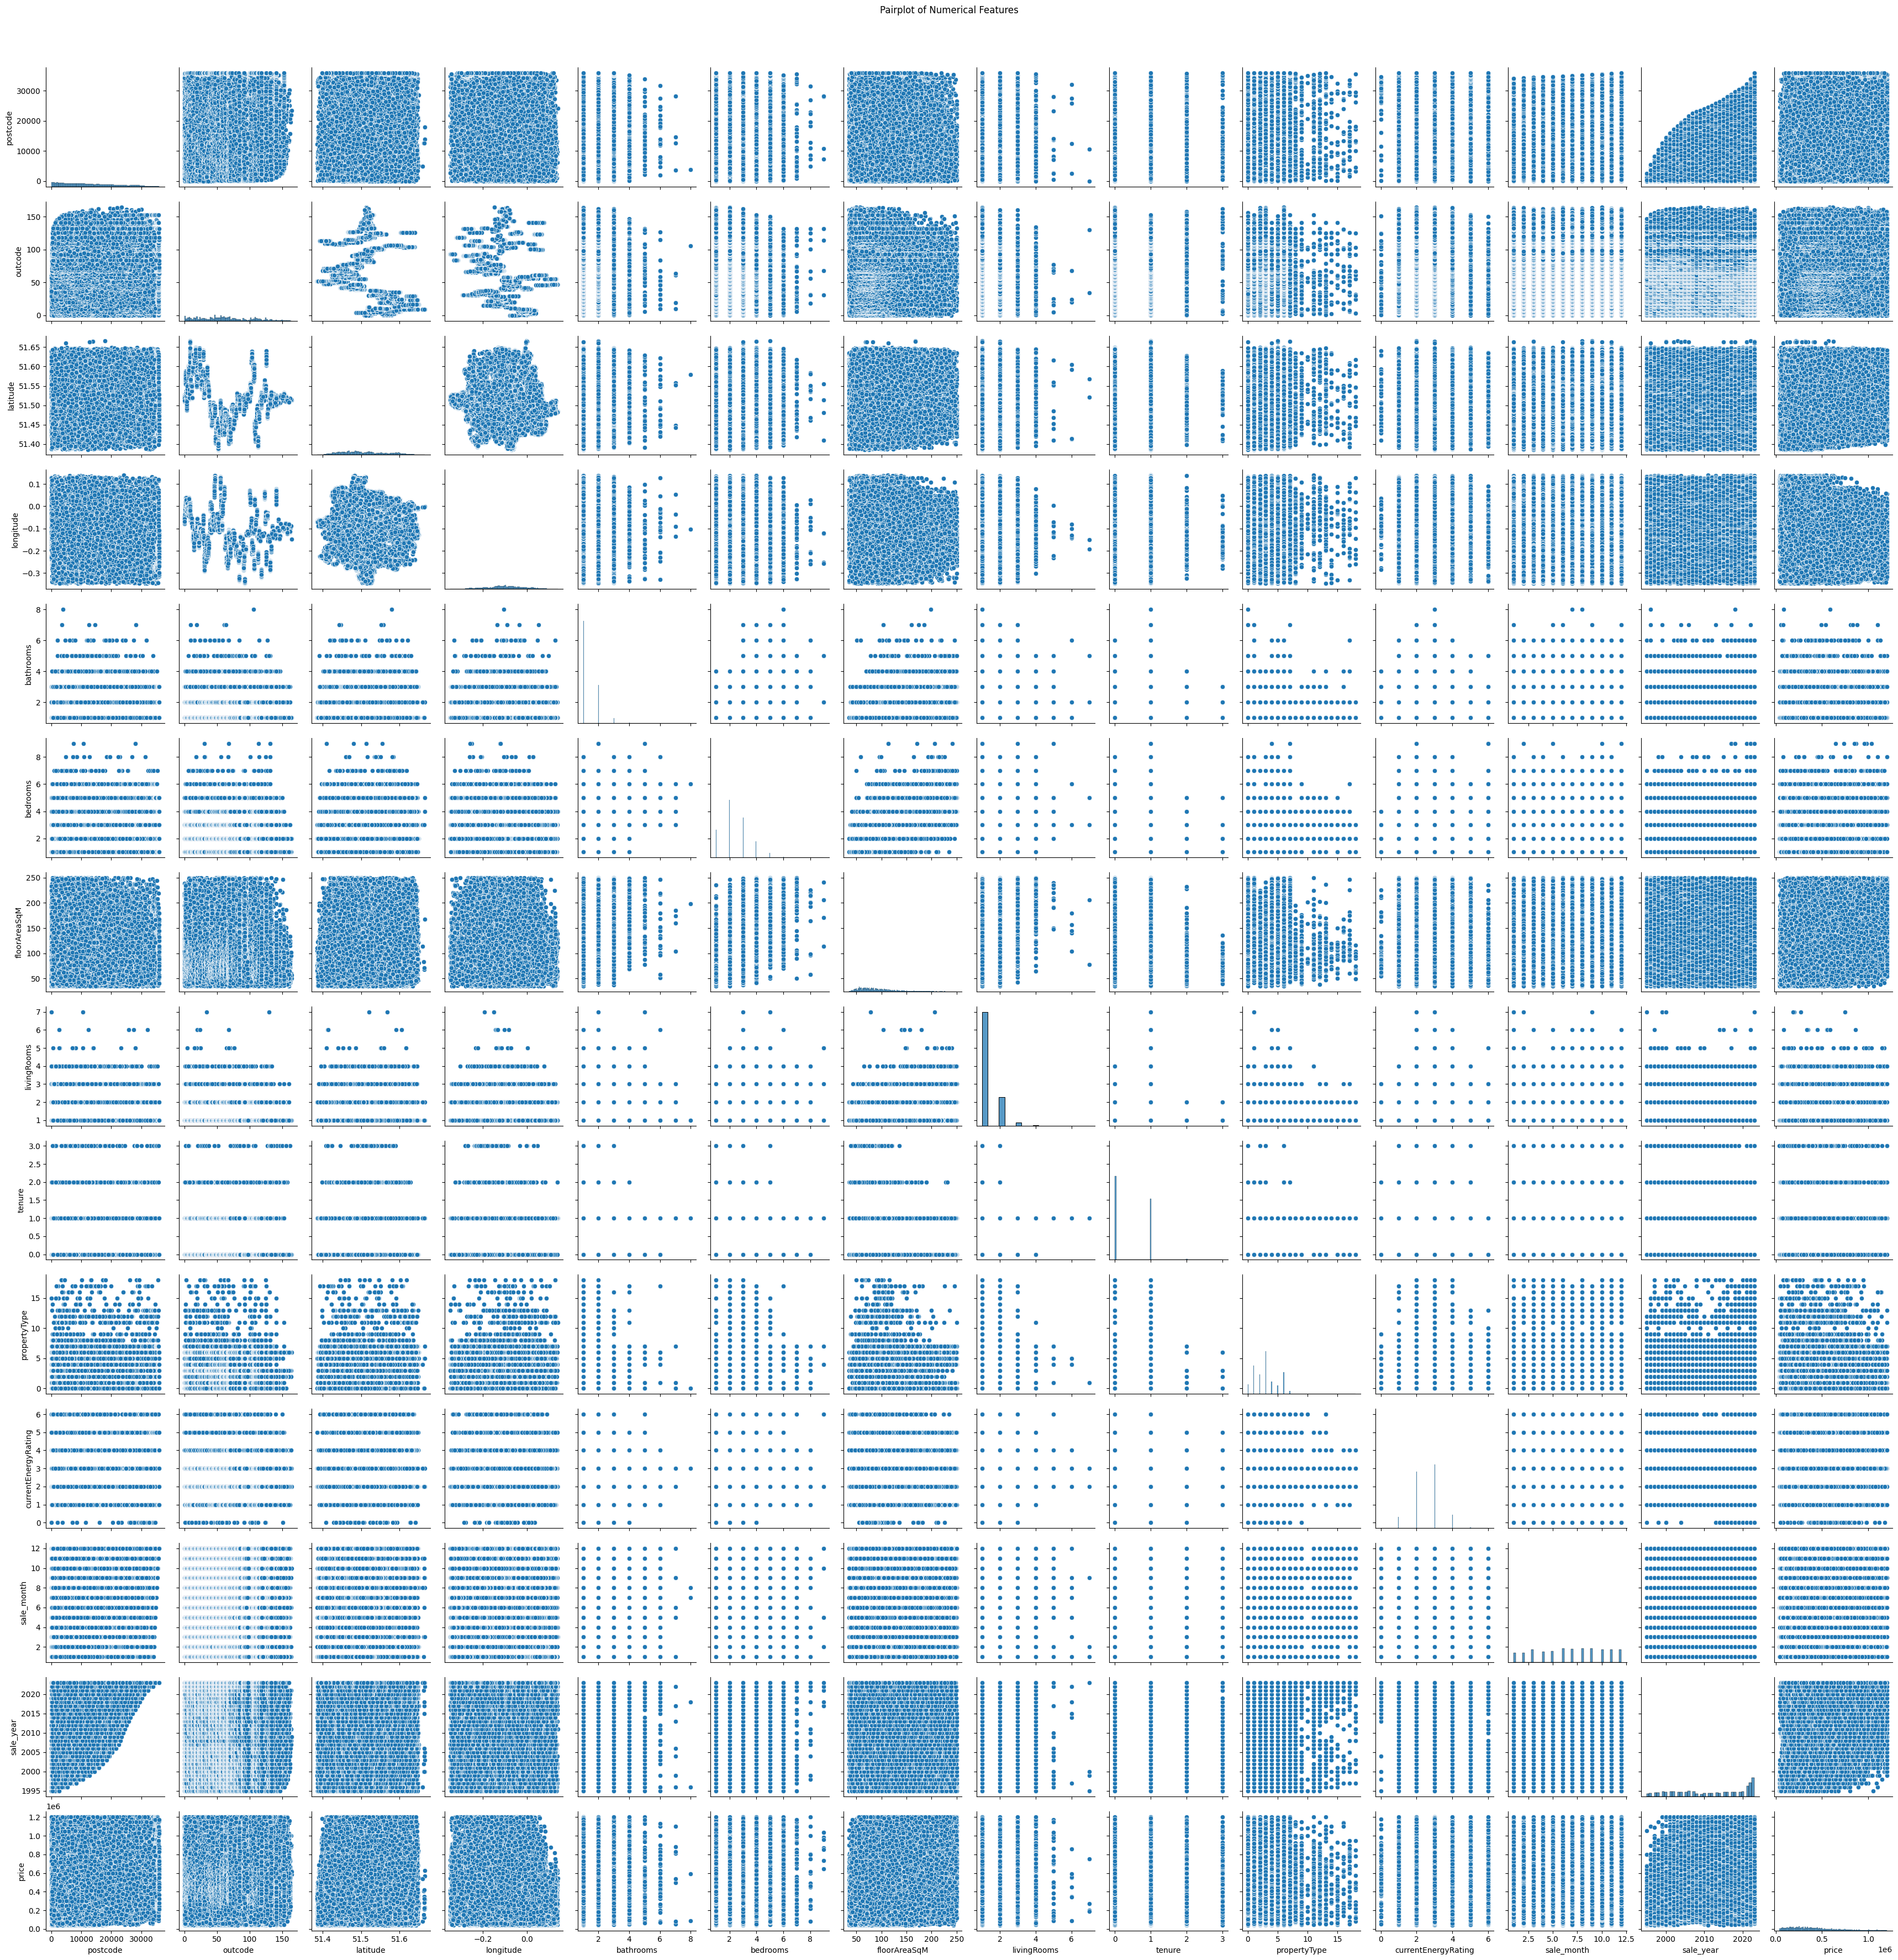

In [ ]:
data_copy = data.drop('ID' , axis=1)
data_copy.head()
numerical = data_copy.select_dtypes(include=np.number).columns
sns.pairplot(data[numerical])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [ ]:
data.shape

(150827, 17)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score, root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

In [ ]:
x = x.drop('postcode',axis=1)
x.head()

outcode   latitude  longitude  bathrooms  floorAreaSqM  livingRooms  \
1      0.0  51.521261  -0.053384        2.0         110.0          1.0   
2      1.0  51.569054  -0.034892        1.0          84.0          1.0   
4      2.0  51.563430   0.006260        1.0         104.0          1.0   
6      4.0  51.487861  -0.020064        1.0          53.0          1.0   
7      5.0  51.553700  -0.005362        2.0         109.0          2.0   

   tenure  propertyType  currentEnergyRating  sale_year  
1       0             0                    3       1995  
2       1             0                    3       1995  
4       1             1                    3       1995  
6       0             2                    3       1995  
7       1             0                    3       1995

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=14)

In [ ]:
x_train.head()

outcode   latitude  longitude  bathrooms  floorAreaSqM  livingRooms  \
118238     43.0  51.464055  -0.064616        1.0          70.0          1.0   
13614      66.0  51.466353  -0.258841        3.0         150.0          1.0   
162908     49.0  51.429721  -0.090452        2.0         148.0          2.0   
106908      1.0  51.564877  -0.007946        1.0          55.0          1.0   
186387     61.0  51.438604   0.053850        1.0         105.0          2.0   

        tenure  propertyType  currentEnergyRating  sale_year  
118238       0             2                    3       2012  
13614        1             0                    2       1997  
162908       1             1                    2       2018  
106908       0             3                    2       2010  
186387       1             4                    3       2020

In [ ]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=14)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
mean_absolute_error(y_test , y_predict)

79256.90067510337

In [ ]:
mean_squared_error(y_test , y_predict)

14213724409.663902

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Assignment/test.csv")
test.info()
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16547 entries, 0 to 16546
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16547 non-null  int64  
 1   fullAddress          16547 non-null  object 
 2   postcode             16547 non-null  object 
 3   country              16547 non-null  object 
 4   outcode              16547 non-null  object 
 5   latitude             16547 non-null  float64
 6   longitude            16547 non-null  float64
 7   bathrooms            13923 non-null  float64
 8   bedrooms             15172 non-null  float64
 9   floorAreaSqM         14541 non-null  float64
 10  livingRooms          14452 non-null  float64
 11  tenure               15957 non-null  object 
 12  propertyType         16380 non-null  object 
 13  currentEnergyRating  15050 non-null  object 
 14  sale_month           16547 non-null  int64  
 15  sale_year            16547 non-null 

In [ ]:
root_mean_squared_error(y_test , y_predict)

119221.32531415638

In [ ]:
r2_score(y_test , y_predict)

0.7867179739309367

In [ ]:
import joblib

In [ ]:
joblib.dump(model, '/content/drive/MyDrive/Assignment/londonhousepredict.pkl')

['/content/drive/MyDrive/Assignment/londonhousepredict.pkl']

# SVM model

In [ ]:
modelSVM = LinearSVR()

In [ ]:
modelSVM.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [ ]:
y_predict_svc = modelSVM.predict(x_test)

In [ ]:
r2_score(y_test , y_predict_svc)

0.18534435060727983

# Linear Regression

In [ ]:
modelRG = LinearRegression()

In [ ]:
modelRG.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_predict_RG = modelRG.predict(x_test)

In [ ]:
r2_score(y_test , y_predict_RG)

0.6330091281576593

In [ ]:
# modelLogic = LogisticRegression()

In [ ]:
# modelLogic.fit(x_train , y_train)

In [ ]:
# y_predict_LG = modelLogic.predict(x_test)

In [ ]:
# r2_score(y_test , y_predict_LG)

# KNeighbors

In [ ]:
modelKN = KNeighborsRegressor(n_neighbors=7)

In [ ]:
modelKN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
y_predict_kn = modelKN.predict(x_test)

In [ ]:
r2_score(y_test , y_predict_kn)

0.7293769673284095

In [ ]:
# print()

**Neural network**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler();
x_train_p = scaler.fit_transform(x_train)
x_test_p = scaler.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import R2Score


In [ ]:
model = Sequential([
    Dense(128,activation='relu' , input_shape=(x_train_p.shape[1],)),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss="mse",
    metrics=['mae' , R2Score()]
)

In [ ]:
model.fit(
    x_train_p,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 114401935360.0000 - mae: 245408.5312 - r2_score: -0.6724 - val_loss: 24150274048.0000 - val_mae: 112325.3906 - val_r2_score: 0.6444
Epoch 2/10
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 23572219904.0000 - mae: 110594.4531 - r2_score: 0.6477 - val_loss: 23262965760.0000 - val_mae: 110034.6797 - val_r2_score: 0.6575
Epoch 3/10
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 22685390848.0000 - mae: 108294.9922 - r2_score: 0.6621 - val_loss: 22936606720.0000 - val_mae: 109349.5703 - val_r2_score: 0.6623
Epoch 4/10
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 22277738496.0000 - mae: 106780.3281 - r2_score: 0.6677 - val_loss: 22686830592.0000 - val_mae: 108626.2656 - val_r2_score: 0.6660
Epoch 5/10
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 22046865408.0000 - mae: 106571.0312 - r2_score: 0.6721 - val_loss: 22447609856.0000 - val_mae: 107522.2812 - val_r2_score: 0.6695
Epoch 6/10
3017/3017 ━━━━━━━━━━━━━━━

In [ ]:
loss_nn, mae_nn , r2_nn = model.evaluate(x_test_p, y_test)

943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21948456960.0000 - mae: 105024.1328 - r2_score: 0.6716


In [ ]:
# print(f'Test MAE: {mae}')
# print(f'Test R-squared: {r2_score}')

Test R-squared: <function r2_score at 0x7ce955b58a40>


## Exploratory Data Analysis (EDA)

basic information about the training data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

descriptive statistics

In [ ]:
display(train.describe())

ID       latitude      longitude      bathrooms  \
count  266325.000000  266325.000000  266325.000000  217846.000000   
mean   133162.000000      51.510090      -0.104639       1.439471   
std     76881.549558       0.056709       0.088074       0.721365   
min         0.000000      51.385708      -0.347055       1.000000   
25%     66581.000000      51.466685      -0.159167       1.000000   
50%    133162.000000      51.507202      -0.108622       1.000000   
75%    199743.000000      51.550937      -0.049202       2.000000   
max    266324.000000      51.665823       0.139249       9.000000   

            bedrooms   floorAreaSqM    livingRooms     sale_month  \
count  241482.000000  252519.000000  229285.000000  266325.000000   
mean        2.496140      99.624088       1.292160       6.805670   
std         1.172209      56.454683       0.583029       3.356693   
min         1.000000      10.000000       1.000000       1.000000   
25%         2.000000      63.000000       1.000000       4.000000   
50%         2.000000      85.000000       1.000000       7.000000   
75%         3.000000     118.000000       1.000000      10.000000   
max         9.000000     500.000000       9.000000      12.000000   

           sale_year         price  
count  266325.000000  2.663250e+05  
mean     2012.213855  6.161788e+05  
std         9.143113  1.274105e+06  
min      1995.000000  1.000000e+04  
25%      2004.000000  2.165000e+05  
50%      2014.000000  3.850000e+05  
75%      2021.000000  6.500000e+05  
max      2023.000000  1.000000e+08

the number of unique values

In [ ]:
display(train.nunique())

ID                     266325
fullAddress            118345
postcode                45064
country                     1
outcode                   167
latitude                82653
longitude               83295
bathrooms                   9
bedrooms                    9
floorAreaSqM              488
livingRooms                 9
tenure                      4
propertyType               19
currentEnergyRating         7
sale_month                 12
sale_year                  29
price                   16882
dtype: int64

Identifying missing values

In [ ]:
display(train.isnull().sum())

ID                         0
fullAddress                0
postcode                   0
country                    0
outcode                    0
latitude                   0
longitude                  0
bathrooms              48479
bedrooms               24843
floorAreaSqM           13806
livingRooms            37040
tenure                  5721
propertyType             508
currentEnergyRating    56814
sale_month                 0
sale_year                  0
price                      0
dtype: int64

Visualizing the distribution

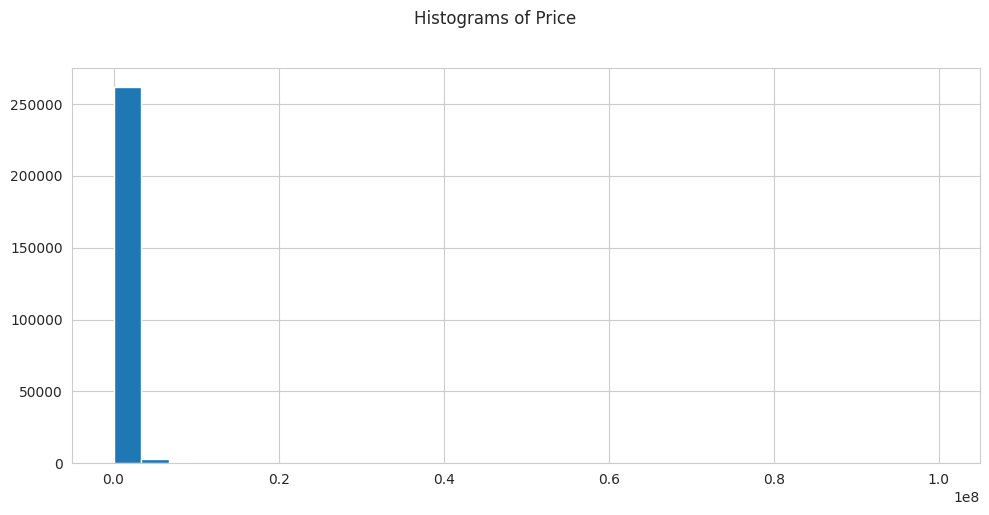

In [ ]:
sns.set_style('whitegrid')

train["price"].hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Price', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# sns.set_style('whitegrid')

# numerical_features = ['price', 'floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms']
# train[numerical_features].hist(bins=30, figsize=(15, 10))
# plt.suptitle('Histograms of Numerical Features', y=1.02)
# plt.tight_layout()
# plt.show()

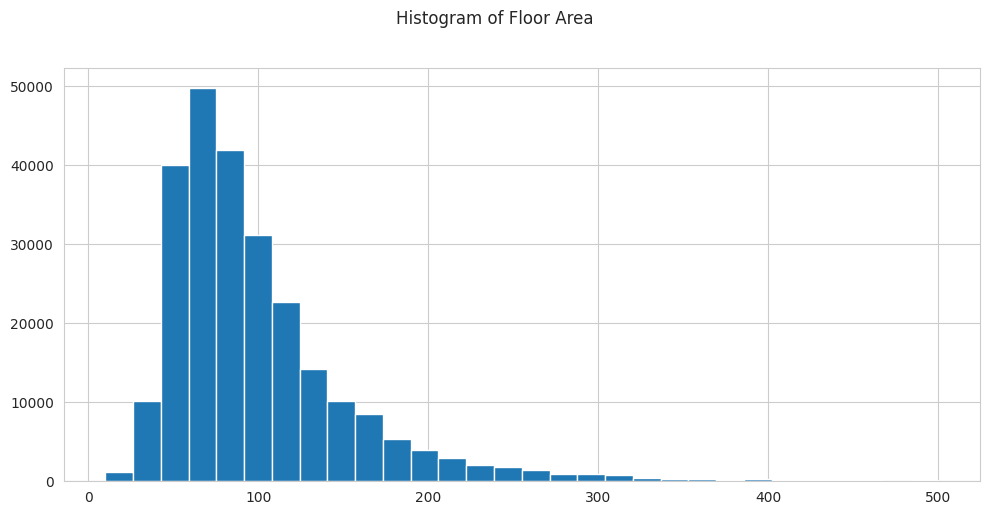

In [ ]:
sns.set_style('whitegrid')

train['floorAreaSqM'].hist(bins=30, figsize=(10, 5))
plt.suptitle('Histogram of Floor Area', y=1.02)
plt.tight_layout()
plt.show()

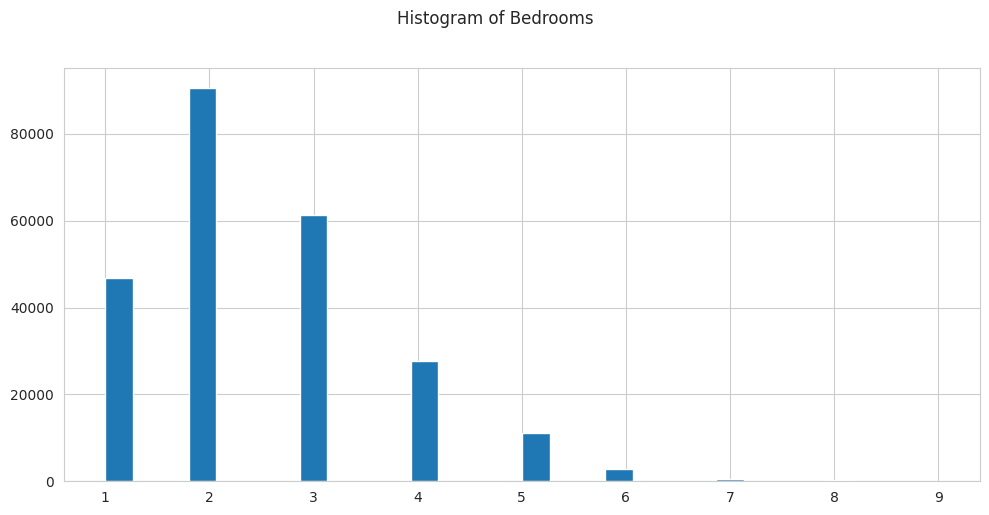

In [ ]:
sns.set_style('whitegrid')

train['bedrooms'].hist(bins=30, figsize=(10,5))
plt.suptitle('Histogram of Bedrooms', y=1.02)
plt.tight_layout()
plt.show()

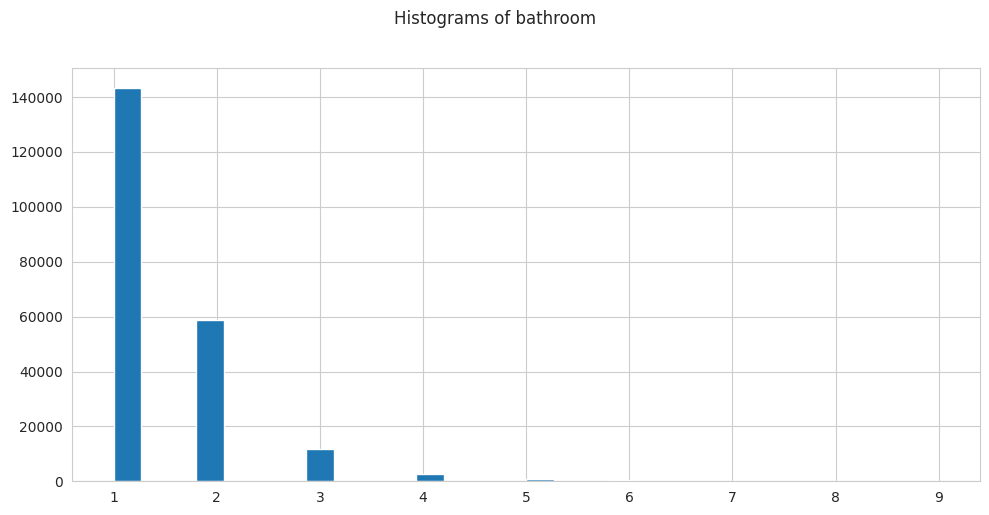

In [ ]:
sns.set_style('whitegrid')

train['bathrooms'].hist(bins=30, figsize=(10,5))
plt.suptitle('Histograms of bathroom', y=1.02)
plt.tight_layout()
plt.show()

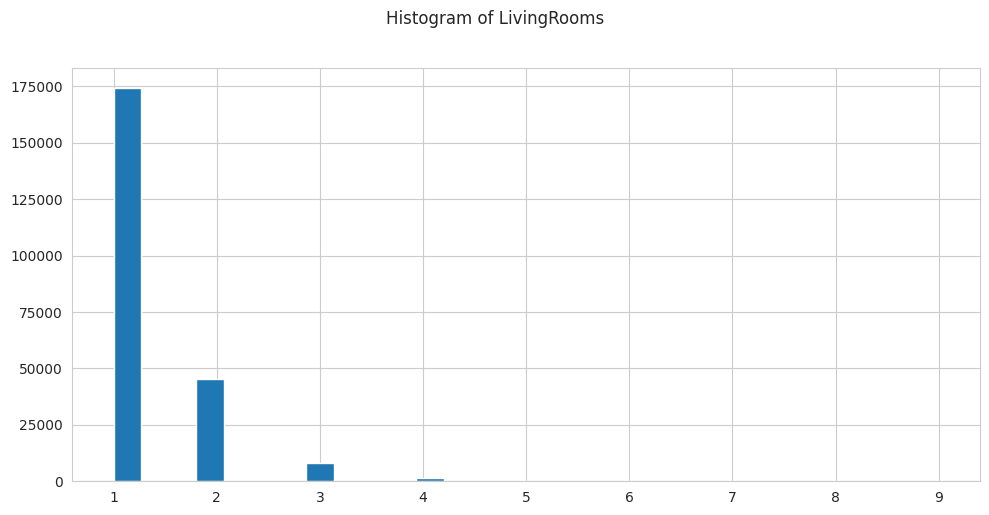

In [ ]:
sns.set_style('whitegrid')

train['livingRooms'].hist(bins=30, figsize=(10,5))
plt.suptitle('Histogram of LivingRooms', y=1.02)
plt.tight_layout()
plt.show()

visualize the distribution of categorical features using count plots to see the frequency of each category.

/tmp/ipython-input-3930293267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, palette='viridis')


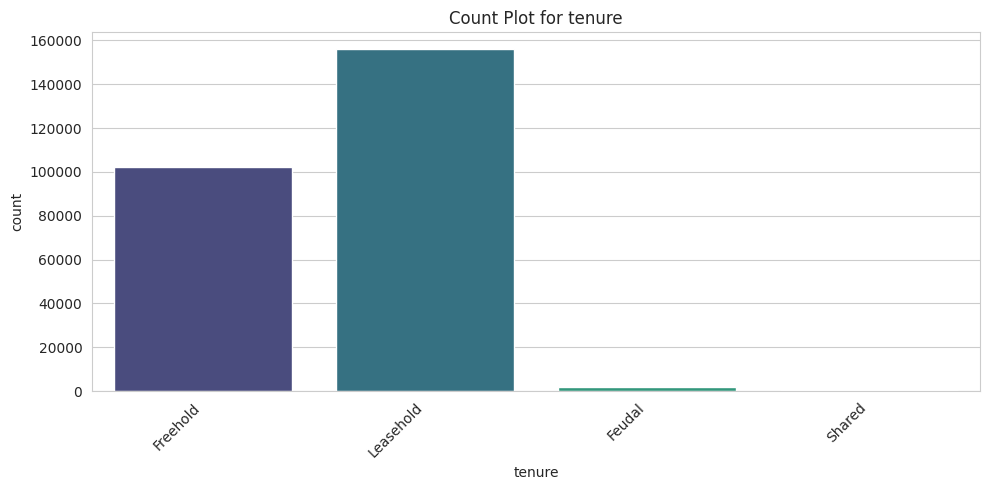

/tmp/ipython-input-3930293267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, palette='viridis')


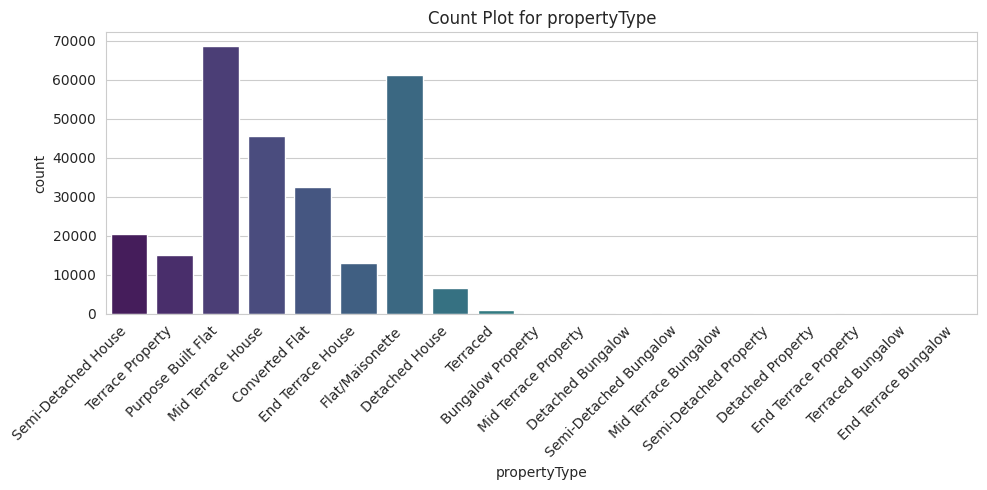

/tmp/ipython-input-3930293267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, palette='viridis')


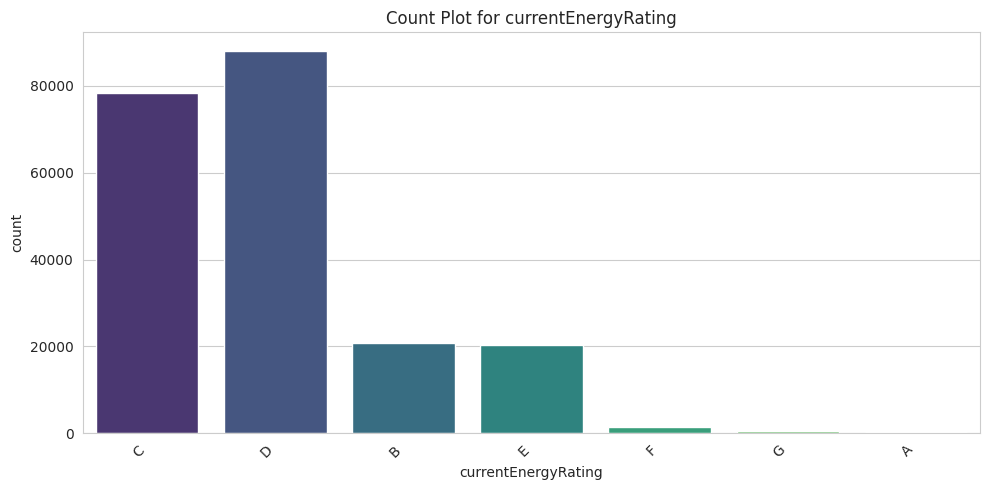

/tmp/ipython-input-3930293267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, palette='viridis')


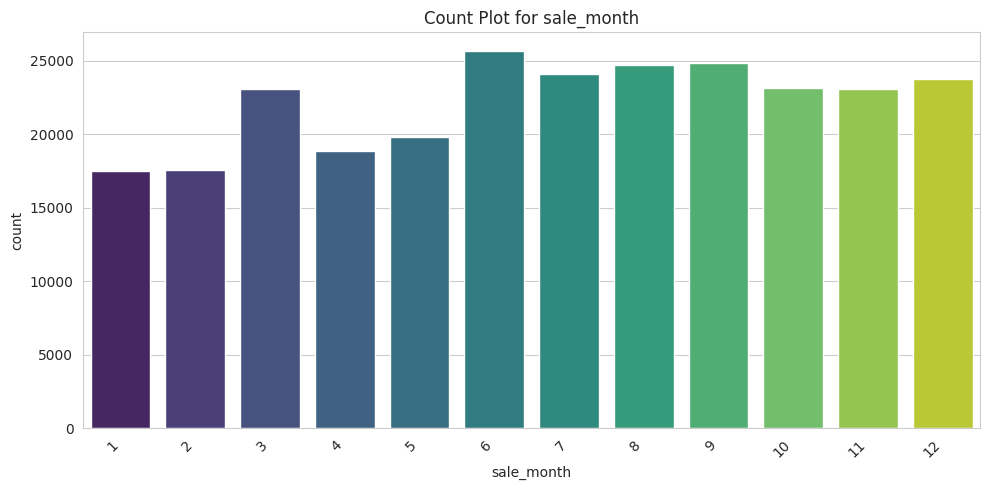

/tmp/ipython-input-3930293267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, palette='viridis')


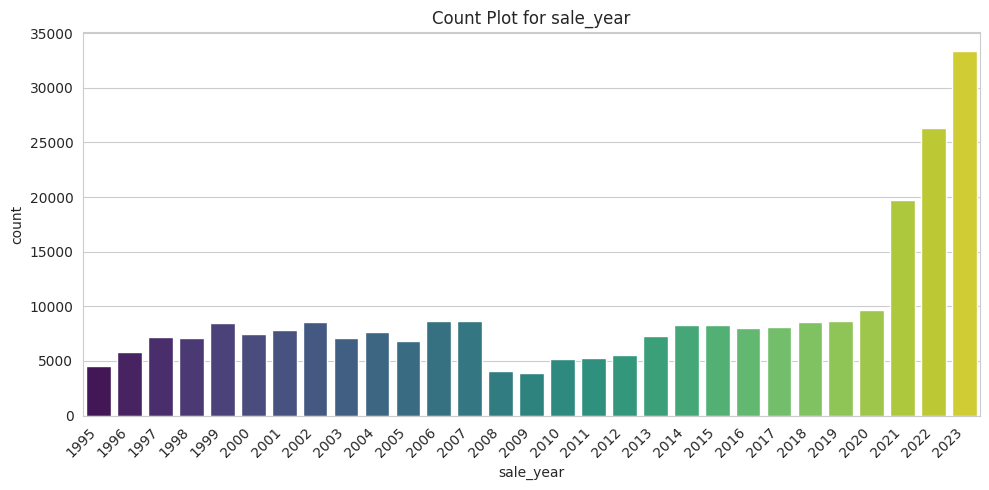

In [ ]:
categorical_features = ['tenure', 'propertyType', 'currentEnergyRating', 'sale_month', 'sale_year']

features_to_plot = ['tenure', 'propertyType', 'currentEnergyRating', 'sale_month', 'sale_year']

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=feature, palette='viridis')
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Exploring the relationships between numerical features using scatter plots can reveal correlations and trends.

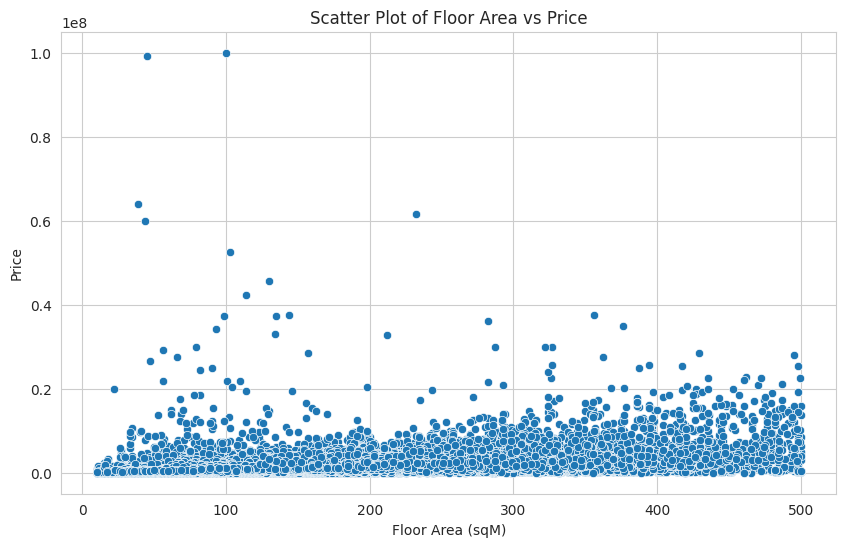

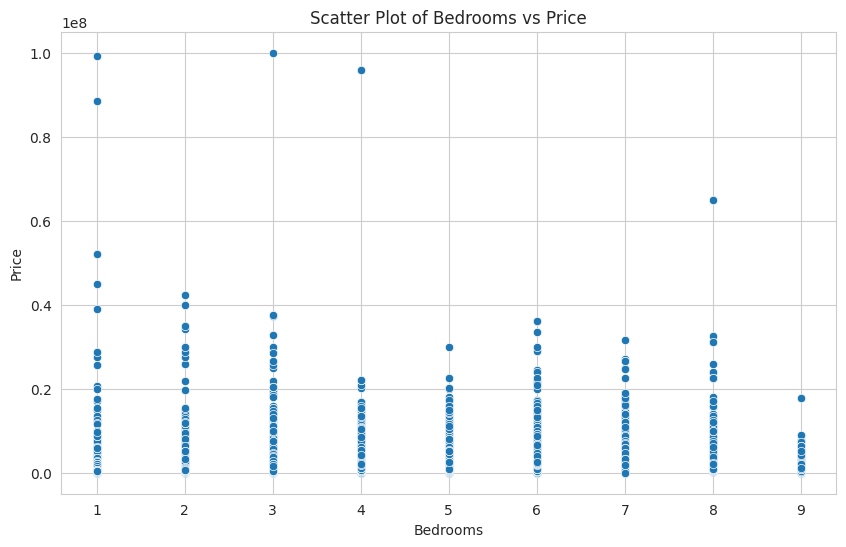

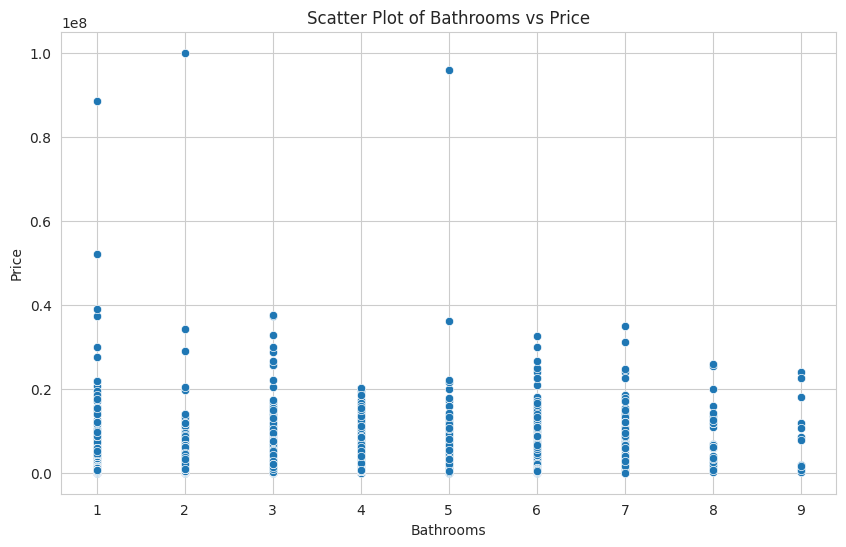

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='floorAreaSqM', y='price')
plt.title('Scatter Plot of Floor Area vs Price')
plt.xlabel('Floor Area (sqM)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='bedrooms', y='price')
plt.title('Scatter Plot of Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='bathrooms', y='price')
plt.title('Scatter Plot of Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

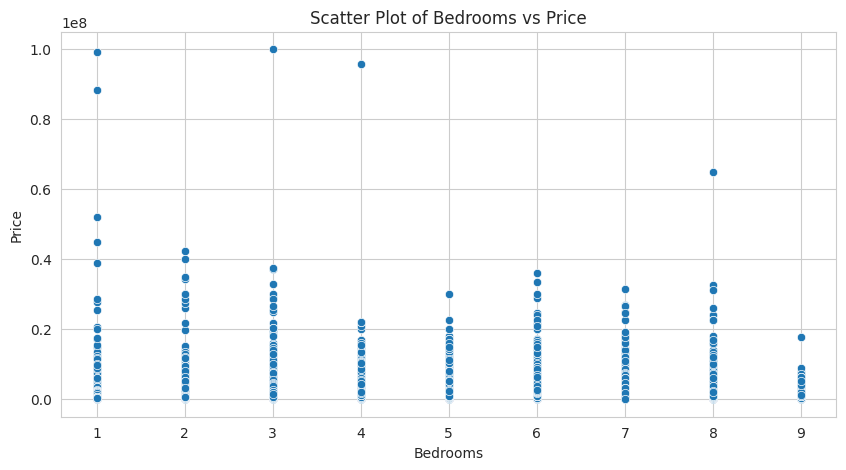

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='bedrooms', y='price')
plt.title('Scatter Plot of Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

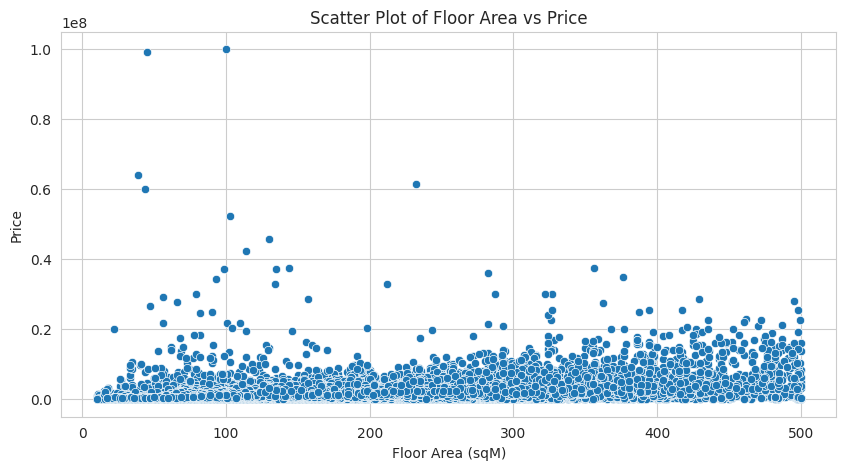

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='floorAreaSqM', y='price')
plt.title('Scatter Plot of Floor Area vs Price')
plt.xlabel('Floor Area (sqM)')
plt.ylabel('Price')
plt.show()

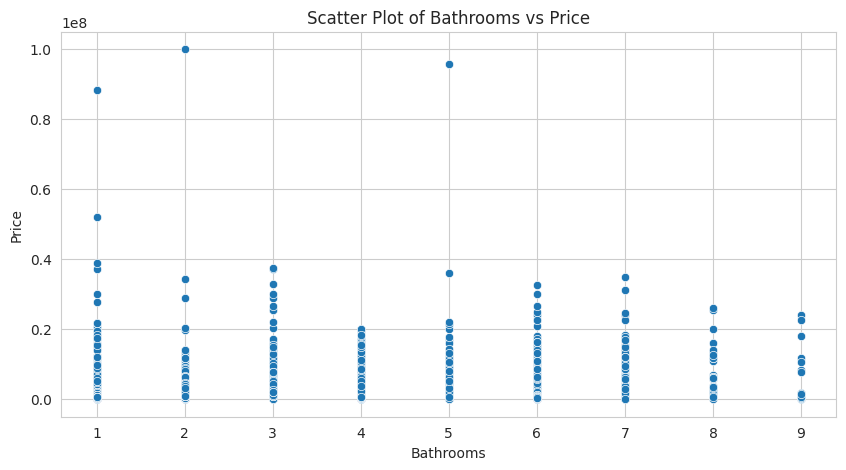

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='bathrooms', y='price')
plt.title('Scatter Plot of Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

visualizing the relationship between a numerical feature and a categorical feature, and for identifying outliers within each category.

/tmp/ipython-input-3092359369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=feature, y='price', palette='viridis')


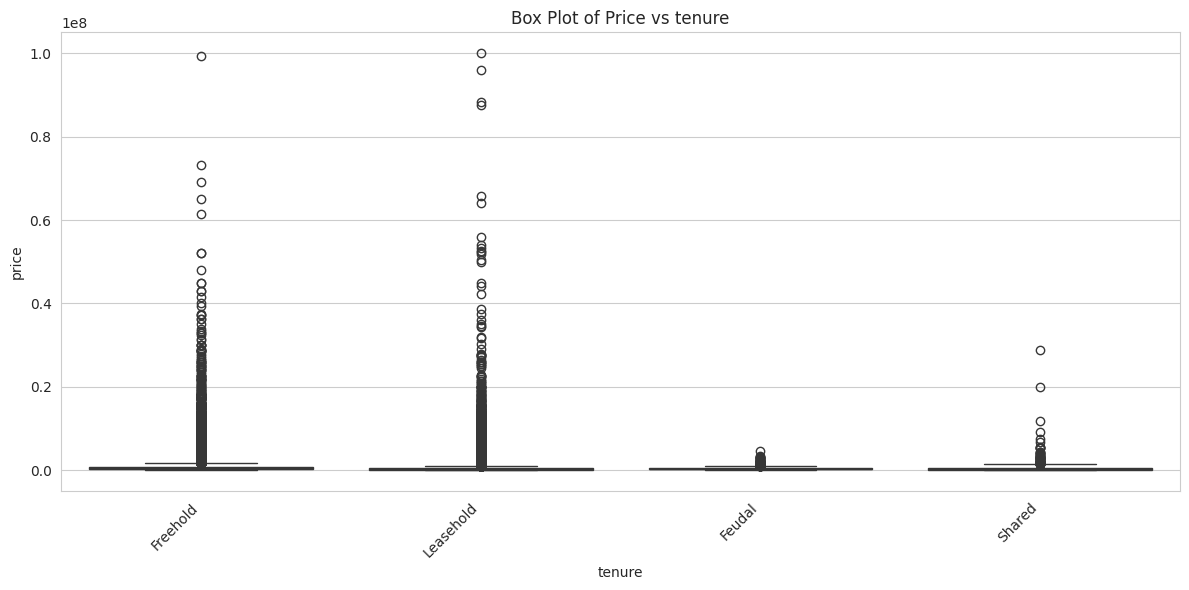

/tmp/ipython-input-3092359369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=feature, y='price', palette='viridis')


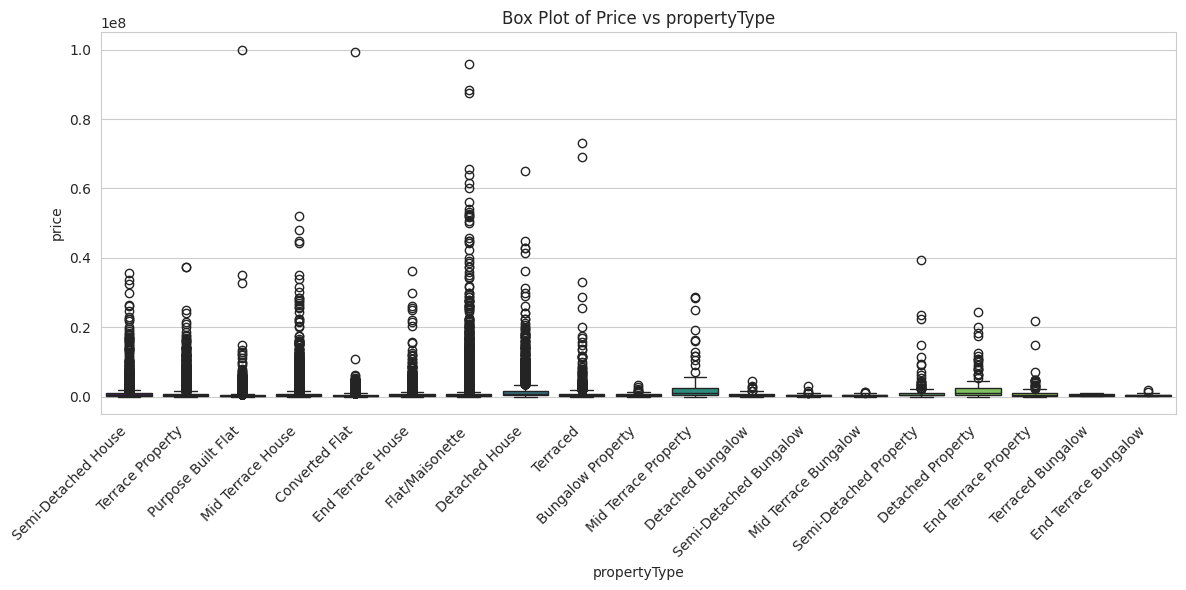

/tmp/ipython-input-3092359369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=feature, y='price', palette='viridis')


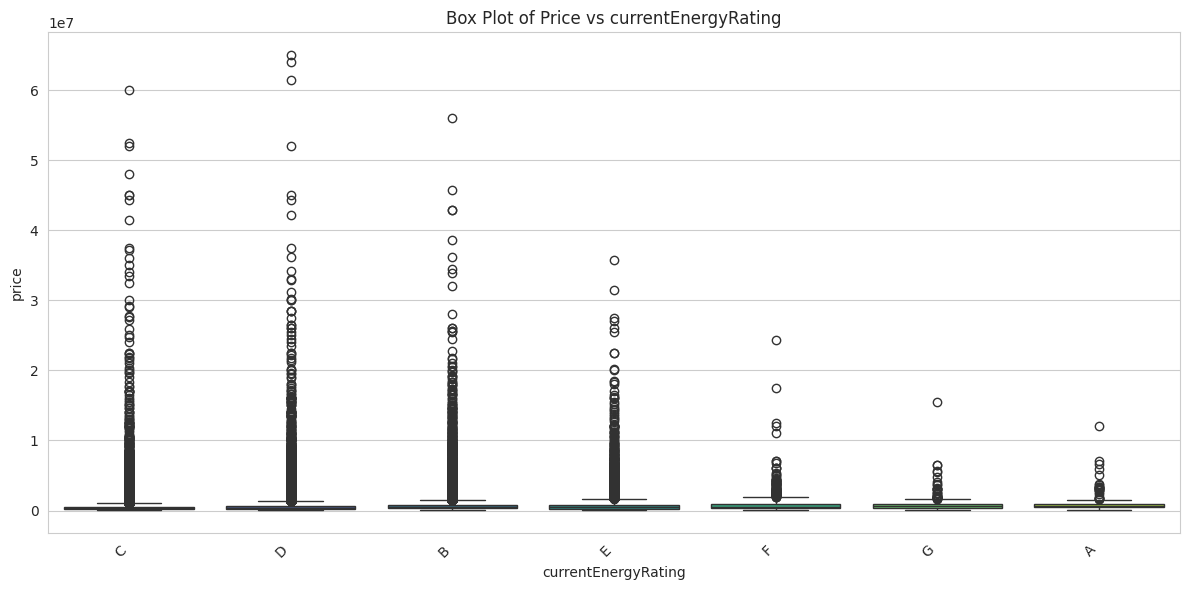

In [ ]:
categorical_features_for_boxplot = ['tenure', 'propertyType', 'currentEnergyRating']

for feature in categorical_features_for_boxplot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train, x=feature, y='price', palette='viridis')
    plt.title(f'Box Plot of Price vs {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-256614224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='tenure', y='price', palette='viridis')


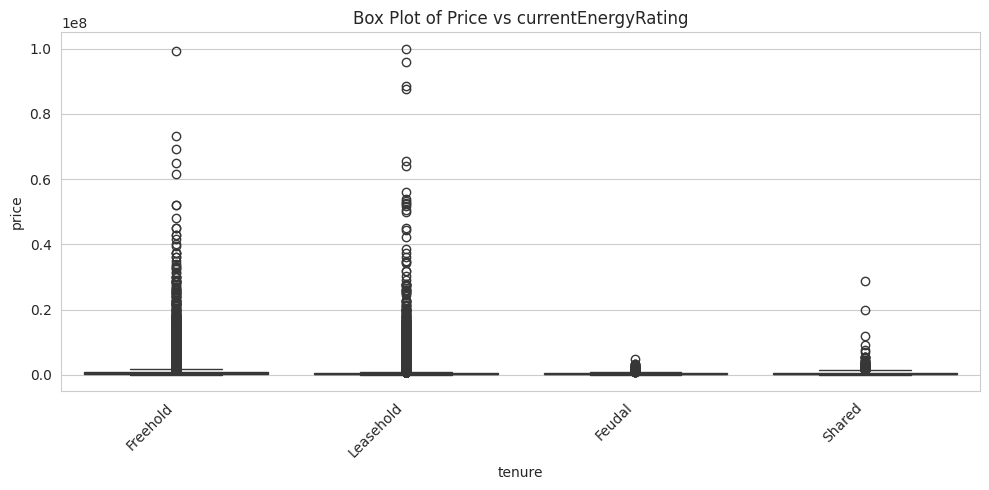

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='tenure', y='price', palette='viridis')
plt.title(f'Box Plot of Price vs {feature}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3303054555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='propertyType', y='price', palette='viridis')


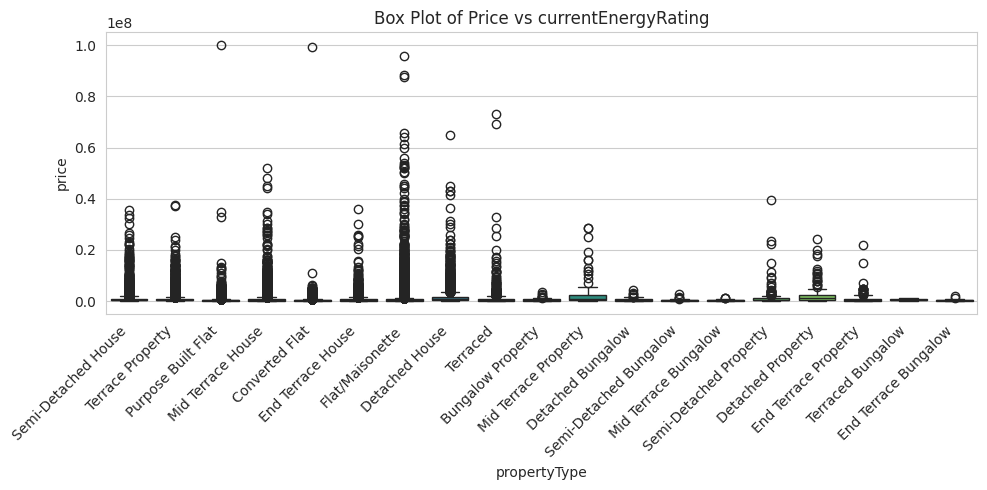

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='propertyType', y='price', palette='viridis')
plt.title(f'Box Plot of Price vs {feature}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2569868817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='currentEnergyRating', y='price', palette='viridis')


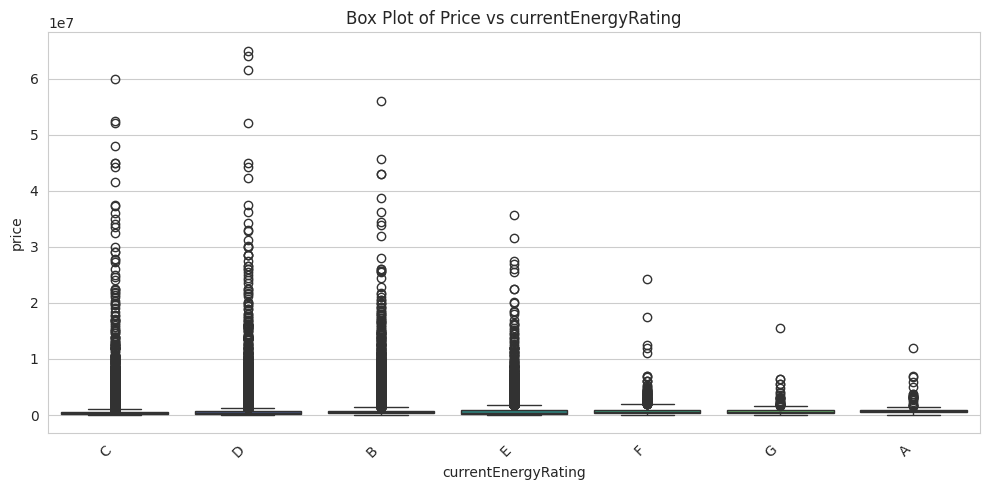

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='currentEnergyRating', y='price', palette='viridis')
plt.title(f'Box Plot of Price vs {feature}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

visualize the correlation matrix for the numerical features to see the strength and direction of linear relationships.

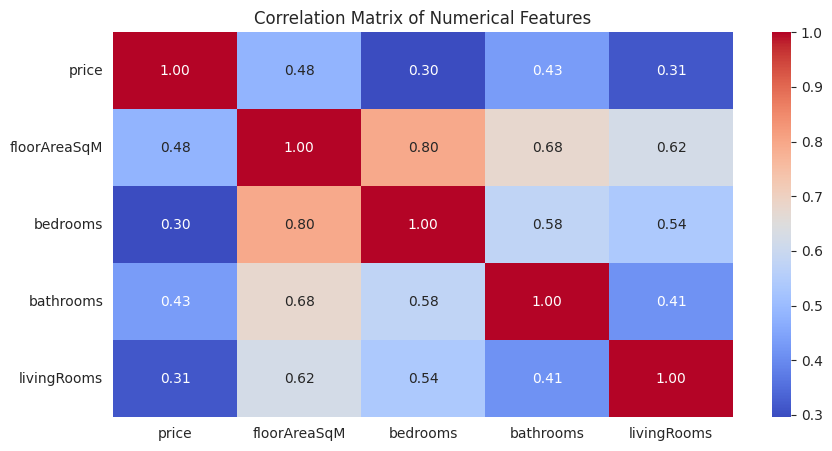

In [ ]:
numerical_features = ['price', 'floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms']
correlation_matrix = train[numerical_features].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()